<a id="top_section"></a>
<div align='center'><font size="6" color="#000000"><b>AnyFin Hiring Task</b></font></div>
<hr>
<div align='center'><font size="4" color="#000000">Data Science Case - Probability of Default Prediction</font></div>
<hr>

**Name**: NGUYEN Thanh-Long

**Email**: nguyenthanhlong1990@gmail.com

**Linkedin:** https://www.linkedin.com/in/longtng/

# Table of Contents
* [Problem Statement](#Problem_Statement)
* [Packages install and import](#package)
* [Data Exploration and General Pre-processing](#Read_and_explore_data)
  * [Overview and Remove Duplicates](#overview)
  * [Missing value check](#missing_check)
  * [Features Analysis](#Features_Analysis)
* [Split Data and Create Dummy Variables](#Split_dummy)
    * [Data Split](#Split)
    * [Weight of Evidence Binning and Dummy Variables](#bining)
* [PD Model](#PD_model)
    * [The Logistic Regression Model Train and Fine Tunning](#logistics)
    * [Calculate the p_values and choose final features](#cal_p_values)
    * [Final PD Model](#final_PD)
* [Model Evaluation](#Evaluation)



---



<a id="Problem_Statement"></a>
# Problem Statement

The purpose of this task is to build a predictive model that assigns default probabilities to loan applications to classify customers going to default (target=1) or non-default (target=0). The noticeable problem is the data is highly imbalanced as defaulted customers contributed only 6% in total. 

<a id="package"></a>

# Packages install and import
[Back To Table of Contents](#top_section)

In [ ]:
!pip install -q ipython-autotime
%load_ext autotime

time: 3.3 ms (started: 2021-06-09 23:47:21 +00:00)


In [ ]:
import sys
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import scipy
import scipy.stats as stat

import matplotlib
import matplotlib.pyplot as plt
# some setting for visualization output
import matplotlib.pyplot as plt; 
plt.style.use('fivethirtyeight')
import matplotlib.axes as axes;
from matplotlib.patches import Ellipse
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_context('notebook')

import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, fbeta_score, roc_curve, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

from difflib import SequenceMatcher

time: 1.13 s (started: 2021-06-09 23:47:21 +00:00)


In [ ]:
# print out the python and all the packages' version, which have been used in this notebook 
print("Python and packages versions:")
print("Python version:", sys.version)
print("Version info.:", sys.version_info)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("scipy version:", scipy.__version__)
print("seaborn version: ", sns.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("skearn version:", sklearn.__version__)
# print("imblearn version:", imblearn.__version__)
# print("category_encoders version:", category_encoders.__version__)
# print("feature_engine version:", feature_engine.__version__)

Python and packages versions:
Python version: 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
Version info.: sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)
pandas version: 1.1.5
numpy version: 1.19.5
scipy version: 1.4.1
seaborn version:  0.11.1
matplotlib version:  3.2.2
skearn version: 0.22.2.post1
time: 5.5 ms (started: 2021-06-09 23:47:22 +00:00)




---



<a id="Read_and_explore_data"></a>

# Data Exploration and General Pre-processing
[Back To Table of Contents](#top_section)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 39.7 s (started: 2021-06-09 23:47:22 +00:00)


In [ ]:
import os 
os.chdir('/content/drive/My Drive/CV and Jobs/Anyfin tasks/')
os.getcwd()

'/content/drive/My Drive/CV and Jobs/Anyfin tasks'

time: 7.55 s (started: 2021-06-09 23:48:01 +00:00)


<a id="overview"></a>

## Overview and Remove Duplicates
[Back To Table of Contents](#top_section)

In [ ]:
# read the input data
df = pd.read_csv("task_dataset.csv")
display(df.shape)

# Check and drop duplicated values 
df.drop_duplicates(inplace=True) 
display(df.shape)

(9369, 23)

(7113, 23)

time: 1.34 s (started: 2021-06-09 23:48:09 +00:00)


In [ ]:
display(df.head().T)

,0,1,2,3,4
day,2.900000e+01,25.00000,15.00000,21.0000,2.100000e+01
hour_1,1.500000e+01,7.00000,19.00000,5.0000,2.100000e+01
week_of_month,5.000000e+00,4.00000,3.00000,3.0000,3.000000e+00
customer_age,3.300000e+01,26.00000,28.00000,51.0000,5.100000e+01
has_paid_120d,0.000000e+00,0.00000,0.00000,0.0000,0.000000e+00
payments_120d,0.000000e+00,0.00000,0.00000,0.0000,0.000000e+00
max_dpd_120d,NaN,NaN,NaN,NaN,NaN
min_dpd_120d,NaN,NaN,NaN,NaN,NaN
payment_vacation_120d,0.000000e+00,0.00000,0.00000,0.0000,0.000000e+00
loans_created_120d,NaN,NaN,NaN,NaN,NaN


time: 41.4 ms (started: 2021-06-09 23:48:10 +00:00)


In [ ]:
display(df.info())
display(df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7113 entries, 0 to 9368
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day                    7113 non-null   int64  
 1   hour_1                 7113 non-null   int64  
 2   week_of_month          7113 non-null   float64
 3   customer_age           7113 non-null   int64  
 4   has_paid_120d          7062 non-null   float64
 5   payments_120d          7062 non-null   float64
 6   max_dpd_120d           1 non-null      float64
 7   min_dpd_120d           1 non-null      float64
 8   payment_vacation_120d  7062 non-null   float64
 9   loans_created_120d     2 non-null      float64
 10  has_payment_plan       7062 non-null   float64
 11  mortgage_house         7113 non-null   int64  
 12  mortgage_apartment     7113 non-null   int64  
 13  credit_used            7113 non-null   int64  
 14  salary_surplus         7112 non-null   float64
 15  inco

None

,count,mean,std,min,25%,50%,75%,max
day,7113.0,19.049487,7.649104e+00,1.000,15.00000,21.00000,2.500000e+01,3.100000e+01
hour_1,7113.0,13.829467,5.348514e+00,0.000,10.00000,14.00000,1.800000e+01,2.300000e+01
week_of_month,7113.0,3.152678,1.098508e+00,1.000,3.00000,3.00000,4.000000e+00,5.000000e+00
customer_age,7113.0,32.458035,8.680086e+00,19.000,26.00000,30.00000,3.600000e+01,8.100000e+01
has_paid_120d,7062.0,0.000142,1.189970e-02,0.000,0.00000,0.00000,0.000000e+00,1.000000e+00
payments_120d,7062.0,0.000566,4.759881e-02,0.000,0.00000,0.00000,0.000000e+00,4.000000e+00
max_dpd_120d,1.0,0.000000,NaN,0.000,0.00000,0.00000,0.000000e+00,0.000000e+00
min_dpd_120d,1.0,0.000000,NaN,0.000,0.00000,0.00000,0.000000e+00,0.000000e+00
payment_vacation_120d,7062.0,0.000000,0.000000e+00,0.000,0.00000,0.00000,0.000000e+00,0.000000e+00
loans_created_120d,2.0,1.000000,1.414214e+00,0.000,0.50000,1.00000,1.500000e+00,2.000000e+00


time: 151 ms (started: 2021-06-09 23:48:10 +00:00)


In [ ]:
pd.set_option('display.max_colwidth', 500) # Setting pandas to display a N number of columns

temp_df = pd.concat([df.apply(lambda col: col.nunique()), df.apply(lambda col: col.sort_values(ascending=True).unique())], axis=1)
temp_df.columns = ["no_uniques", "uniques"]
temp_df

,no_uniques,uniques
day,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]"
hour_1,24,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]"
week_of_month,5,"[1.0, 2.0, 3.0, 4.0, 5.0]"
customer_age,63,"[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]"
has_paid_120d,2,"[0.0, 1.0, nan]"
payments_120d,2,"[0.0, 4.0, nan]"
max_dpd_120d,1,"[0.0, nan]"
min_dpd_120d,1,"[0.0, nan]"
payment_vacation_120d,1,"[0.0, nan]"
loans_created_120d,2,"[0.0, 2.0, nan]"


time: 91 ms (started: 2021-06-09 23:48:11 +00:00)


Number of defaults 428
Number of non-defaults 7113


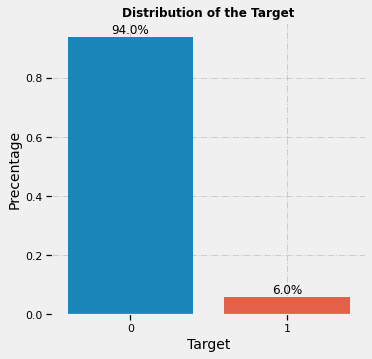

time: 346 ms (started: 2021-06-09 23:48:11 +00:00)


In [ ]:
print("Number of defaults", df["target"].sum())
print("Number of non-defaults", len(df["target"]))

# Ploting barplot for target 
plt.figure(figsize=(5, 5))
g = sns.barplot(df['target'], df['target'], estimator=lambda x: len(x) / len(df) )

# Anotating the graph
for p in g.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy() 
  g.text(x + width/2, y + height + 0.01, '{:.1%}'.format(height), horizontalalignment='center', fontsize=12)

# Setting the labels
plt.grid(True, linestyle='-.') 
plt.xlabel('Target', fontsize=14)
plt.ylabel('Precentage', fontsize=14)
plt.title('Distribution of the Target', weight="semibold")
plt.show()

<div class="comment">
The target is highly imbalanced as it only got 6% in defaults and 94% non-defaults.
The dataset have 9,369 - 7,113 = 2,256 duplicated data points.
</div>

<a id="missing_check"></a>

## Missing value check
[Back To Table of Contents](#top_section)

In [ ]:
def missingcheck(df):
  """
    Calculate the missing values in each attribute
    The results are the total numbers of attributes having missing values and 
    percentages of non-missing values of these attribute
  """
  total = df.isnull().sum()
  percent = (df.isnull().sum()/df.isnull().count()*100)
  missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  total_missing = df.shape[0] - df.dropna().shape[0]
  missing = missing[missing['Total']>0]
  missing = missing.sort_values(by=['Percent'], ascending=False)
  missing.loc["Total Missing"] = [total_missing, (total_missing)/df.shape[0]*100]
  print("The attributes having missing values and percentages of non-missing values of these attributes:")
  print()
  print(missing)
  print()
  print("The number of attributes have missing values are", len(missing)-1)
  return missing

time: 14.9 ms (started: 2021-06-09 23:48:11 +00:00)


In [ ]:
# List out all the Missing Values:
missing = missingcheck(df)
missing = missing.drop("Total Missing")

The attributes having missing values and percentages of non-missing values of these attributes:

                        Total    Percent
max_dpd_120d           7112.0  99.985941
min_dpd_120d           7112.0  99.985941
loans_created_120d     7111.0  99.971882
has_paid_120d            51.0   0.716997
payments_120d            51.0   0.716997
payment_vacation_120d    51.0   0.716997
has_payment_plan         51.0   0.716997
salary_surplus            1.0   0.014059
income_gross              1.0   0.014059
Total Missing          7112.0  99.985941

The number of attributes have missing values are 9
time: 48.8 ms (started: 2021-06-09 23:48:11 +00:00)


In [ ]:
display(df["has_paid_120d"].value_counts())
display(df["payments_120d"].value_counts())
display(df["payment_vacation_120d"].value_counts())
display(df["has_payment_plan"].value_counts())

0.0    7061
1.0       1
Name: has_paid_120d, dtype: int64

0.0    7061
4.0       1
Name: payments_120d, dtype: int64

0.0    7062
Name: payment_vacation_120d, dtype: int64

0.0    7062
Name: has_payment_plan, dtype: int64

time: 32 ms (started: 2021-06-09 23:48:11 +00:00)


In [ ]:
temp_cols = ["has_paid_120d", "payments_120d", "payment_vacation_120d", "has_payment_plan"]
null_df = df[df[temp_cols].isnull().any(axis=1)]
display(null_df.shape, null_df.head(10))

(51, 23)

,day,hour_1,week_of_month,customer_age,has_paid_120d,payments_120d,max_dpd_120d,min_dpd_120d,payment_vacation_120d,loans_created_120d,has_payment_plan,mortgage_house,mortgage_apartment,credit_used,salary_surplus,income_gross,credit_count,creditors_count,address_count,inquiries_count_12m,has_spouse,external_score,target
81,23,10,4.0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,112488,241200.0,239600.0,3,2,1,12,0,7.98750,0
319,9,11,2.0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,75000,433200.0,429900.0,1,1,3,4,0,6.00971,0
505,12,8,2.0,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2828037,2828037,743900.0,704900.0,7,1,1,2,1,0.16191,0
764,24,15,4.0,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,8276,285000.0,284000.0,1,1,1,3,0,0.40962,0
1116,26,18,4.0,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2333340,2515733,296500.0,278500.0,9,6,1,10,0,11.15719,0
1343,23,10,4.0,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2455834,0,3184172,491000.0,458600.0,13,9,1,8,0,6.15305,0
1391,14,17,2.0,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,76062,173500.0,173900.0,6,6,1,11,1,12.20675,0
1420,16,7,3.0,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1794000,1831968,165600.0,136100.0,4,2,1,5,0,5.33729,0
1430,26,20,4.0,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2333340,2477505,270200.0,244700.0,12,8,1,16,0,12.02787,0
1665,30,9,5.0,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,275273,417500.0,396500.0,6,6,1,11,0,15.11870,0


time: 74.6 ms (started: 2021-06-09 23:48:11 +00:00)


In [ ]:
# drop features
df = df.drop(columns=["max_dpd_120d", "min_dpd_120d", "loans_created_120d", "has_paid_120d", 
                      "payments_120d", "payment_vacation_120d", "has_payment_plan"])

# drop the other missing values 
df = df.dropna()

time: 13.8 ms (started: 2021-06-09 23:48:11 +00:00)


<div class="comment">
The following features were dropped:
<ul>
<li> "max_dpd_120d", "min_dpd_120d", "loans_created_120d" - as it got 99.9% missing values.</li> 
<li> "has_paid_120d", "payments_120d", "payment_vacation_120d", "has_payment_plan" - only have 0.7% missing, but it have 99% valued = 0.</li> 
</ul>
</div>

<a id="Features_Analysis"></a>

## Features Analysis
[Back To Table of Contents](#top_section)

### Features and Correlation Visualization

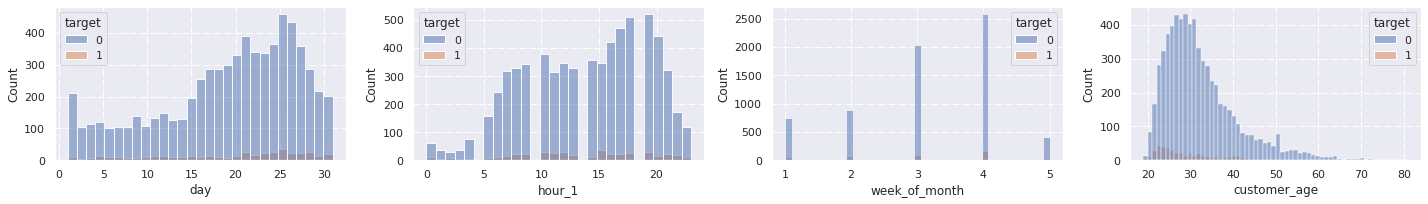

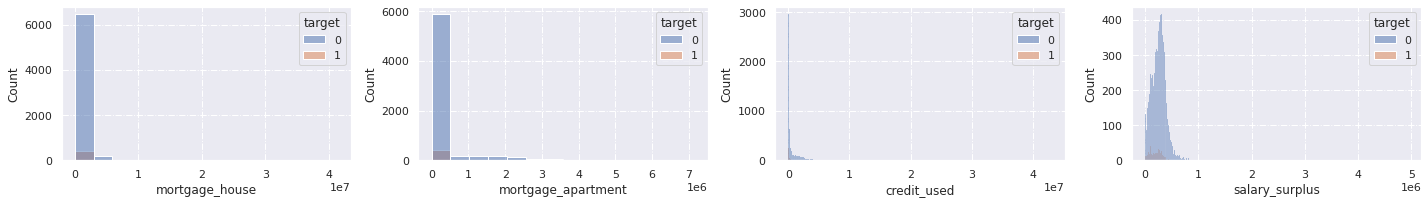

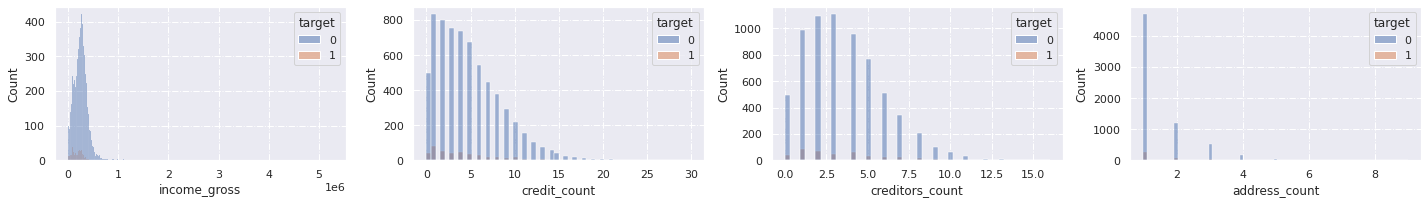

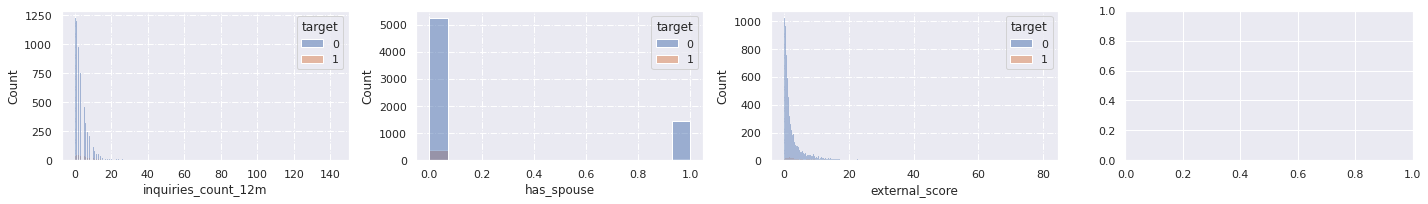

time: 25.4 s (started: 2021-06-09 23:48:11 +00:00)


In [ ]:
# Plot the distribbution of numerical attributes    
def chunks(l, n):
    return [l[i:i + n] for i in range(0, len(l), n)]

def num_plot(df, cols, target, ncols):
    for lst in chunks(cols, ncols):
        sns.set(font_scale = 1)
        fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(20, 3))
        for idx in range(0, len(lst)):
            attr = lst[idx]
            g = sns.histplot(x=attr, data=df.dropna(), hue=target, ax=axes[idx], kde_kws={'bw': 1.5})
            g.grid(True, linestyle='-.') 

        plt.tight_layout()

num_plot(df=df, cols=df.drop(columns=["target"]).columns, target="target", ncols=4)

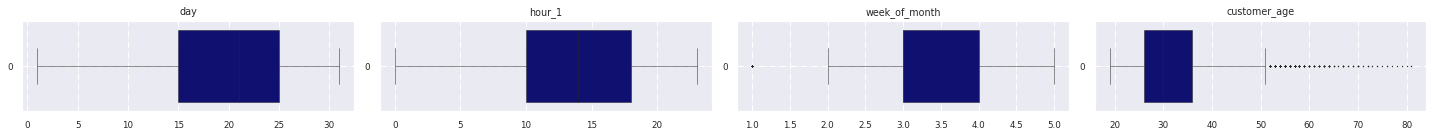

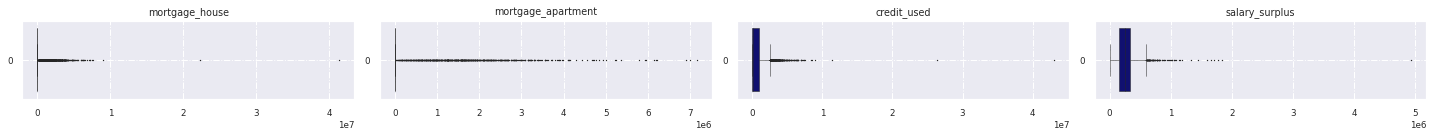

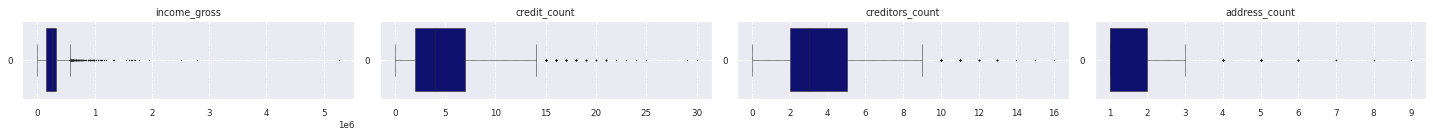

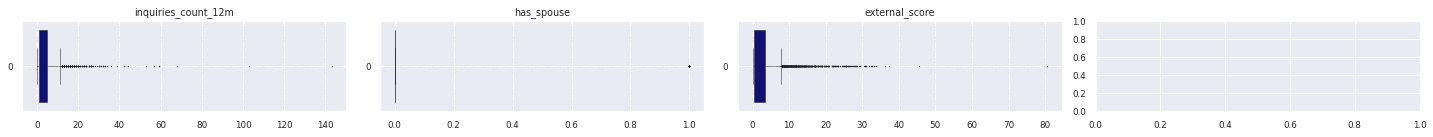

time: 6.52 s (started: 2021-06-09 23:48:37 +00:00)


In [ ]:
# Plot the boxplot of each attribute 
def chunks(l, n):
    return [l[i:i + n] for i in range(0, len(l), n)]

def boxplot(df, cols, ncols):
    for lst in chunks(cols, ncols):
        sns.set(font_scale = 0.8)
        fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(20, 2))
        for idx in range(0, len(lst)):
            attr = lst[idx]
            data = df[attr]
            sns.set_palette('Paired',30)
            g = sns.boxplot(data=df[attr], ax=axes[idx], fliersize=0.5, linewidth=0.5, color='navy', orient="h")
            g.grid(True, linestyle='-.') 
            g.set_title(attr)
        plt.tight_layout()

boxplot(df, df.drop(columns=["target"]).columns, 4)

In [ ]:
def plot_corr(correlationMatrix, threshold = 0.6):
    """
      Plot the correlation matrix
      The matrix output will display the correlation that result higher than threshold 

      Parameters
      ----------
      correlationMatrix: The calculated correlation matrix
      threshold: display the correlation result if higher than threshold - default = 0.6
    """
    fig, ax = plt.subplots(figsize=(12, 12))
    plt.title("Correlation matrix between attributes", weight="semibold")
    ax.title.set_fontsize(10)

    # Build the Color Correlation Matrix
    mask = np.zeros_like(correlationMatrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.set(font_scale = 1)
    g = sns.heatmap(correlationMatrix, cmap='Blues', fmt = '.2f', square = True, 
                    mask=mask, annot=True, annot_kws={"size":10}, linewidths=1.0, ax=ax)

    for text in g.texts:
      t = float(text.get_text())
      if ((t) < threshold):
          text.set_text('')
      else:
          text.set_text(round(t, 2))
    
    # Build the Values Correlation Matrix
    mask[np.triu_indices_from(mask)] = False
    mask[np.tril_indices_from(mask)] = True
    g = sns.heatmap(correlationMatrix, cmap=ListedColormap(['white']), square = True, fmt = '.1f', 
                    linewidths=1.0, mask=mask, annot=True, annot_kws={"size":8}, cbar=False);
    g.set_xticklabels(g.get_xticklabels(), rotation=60, ha="right");
    g.set_yticklabels(g.get_yticklabels(), ha="right");

time: 23.6 ms (started: 2021-06-09 23:48:43 +00:00)


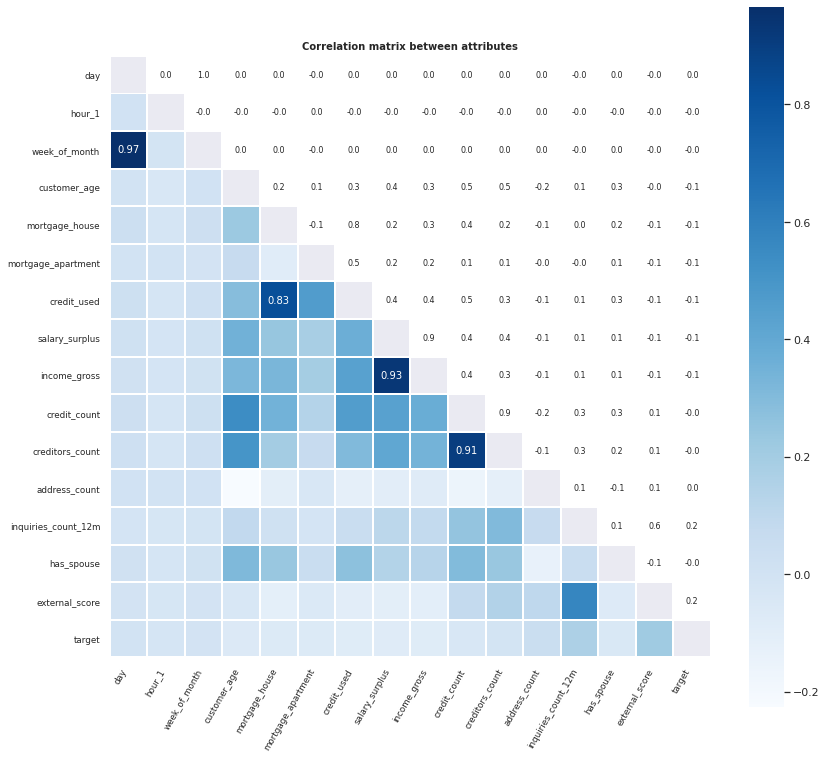

time: 1.54 s (started: 2021-06-09 23:48:43 +00:00)


In [ ]:
# Correlation matrix 
correlationMatrix = df.dropna().corr(method="pearson")
plot_corr(correlationMatrix, 0.8)

### Features Crossing/ Combination

In [ ]:
# check the cases the "mortgage_house" and "mortgage_apartment" is all positive 
display(df[(df["mortgage_house"] > 0) & (df["mortgage_apartment"] > 0)].shape)

# check the cases the "mortgage_house" + "mortgage_apartment" > "credit_used"
display(df[df["mortgage_house"] + df["mortgage_apartment"] - df["credit_used"] > 0].shape)

# credit_used cases
display(df[(df["credit_used"] == 0)].shape)

(44, 16)

(0, 16)

(716, 16)

time: 28.9 ms (started: 2021-06-09 23:48:45 +00:00)


There are the common definition of **"gross income/ income_gross"** and **"surplus income/ salary_surplus"** would be used for the dataset

> For households and individuals, **gross income** is the sum of all wages, salaries, profits, interest payments, rents, and other forms of earnings, before any deductions or taxes.

> Disposable income, **surplus income** - Disposable income or surplus income is what you have left after taxes and other government obligations—i.e. what you have left to live on. 

In [ ]:
# check some conditions/ cases of salary_surplus and income_gross
display(df[(df["salary_surplus"] == 0)].shape)
display(df[(df["income_gross"] == 0)].shape)
display(df[(df["salary_surplus"] == 0) & (df["income_gross"] == 0)].shape)
display(df[(df["salary_surplus"] == 0) & (df["income_gross"] == 0)].head())
display(df[(df["salary_surplus"] > 0) & (df["income_gross"] == 0)].shape)
display(df[(df["salary_surplus"] > 0) & (df["income_gross"] == 0)])

(91, 16)

(63, 16)

(57, 16)

,day,hour_1,week_of_month,customer_age,mortgage_house,mortgage_apartment,credit_used,salary_surplus,income_gross,credit_count,creditors_count,address_count,inquiries_count_12m,has_spouse,external_score,target
212,29,17,5.0,27,0,0,7625,0.0,0.0,3,3,3,3,0,5.00021,0
216,28,15,4.0,23,0,0,1678,0.0,0.0,1,1,2,2,0,10.54600,1
233,18,21,3.0,33,3025300,0,3398050,0.0,0.0,7,5,1,4,1,8.61989,0
398,12,0,2.0,31,0,0,28571,0.0,0.0,1,1,1,0,0,5.71618,0
410,7,14,1.0,27,0,0,0,0.0,0.0,0,0,1,1,0,2.72644,0


(6, 16)

,day,hour_1,week_of_month,customer_age,mortgage_house,mortgage_apartment,credit_used,salary_surplus,income_gross,credit_count,creditors_count,address_count,inquiries_count_12m,has_spouse,external_score,target
728,18,6,3.0,58,2720000,0,3249749,352700.0,0.0,10,7,2,1,0,2.90308,1
1444,6,20,1.0,48,1547802,4759000,6529550,70200.0,0.0,10,5,2,5,0,4.04277,0
1647,25,19,4.0,26,0,0,4677,7800.0,0.0,2,2,1,3,0,17.19547,0
2965,20,20,3.0,45,1454900,0,1561384,45600.0,0.0,12,8,1,1,0,3.29886,0
3065,26,15,4.0,29,0,0,206925,12800.0,0.0,2,1,1,1,0,3.11365,0
5841,21,12,3.0,36,1132500,0,1161597,3600.0,0.0,6,5,1,0,0,2.80823,0


time: 105 ms (started: 2021-06-09 23:48:45 +00:00)


In [ ]:
# The number of credits are always higher than number of creditors in each case
display(df[(df["credit_count"] > df["creditors_count"])].shape)
display(df[(df["credit_count"] < df["creditors_count"])].shape)

(3545, 16)

(0, 16)

time: 12.5 ms (started: 2021-06-09 23:48:45 +00:00)


In [ ]:
# Treatment on each pair of features: 
# day vs. week_of_month: drop day, consider week_of_month as the binning of day 
# credit_used vs. mortgage_house vs. mortgage_apartment: as (mortgage_house +  mortgage_apartment) < credit_used, drop three, 
# create new credit_used_left = credit_used - (mortgage_house + mortgage_apartment)
# income_gross vs. salary_surplus: salary_surplus/income_gross, 
# creditors_count vs. credit_count: credit_count/creditors_count

df["credit_used_left"] =  df["credit_used"] - (df["mortgage_house"] + df["mortgage_apartment"])

df["sal_sur_inc_gross"] = df["salary_surplus"].astype(float)/ df["income_gross"].astype(float)
df["sal_sur_inc_gross"] = df["sal_sur_inc_gross"].replace([np.inf, -np.inf], 0)
df["sal_sur_inc_gross"] = df["sal_sur_inc_gross"].fillna(0) # for the case 0/0 

df["credit_creditors"] = df["credit_count"].astype(float)/ df["creditors_count"].astype(float)
df["credit_creditors"] = df["credit_creditors"].fillna(0) # for the case 0/0 
df.head()

,day,hour_1,week_of_month,customer_age,mortgage_house,mortgage_apartment,credit_used,salary_surplus,income_gross,credit_count,creditors_count,address_count,inquiries_count_12m,has_spouse,external_score,target,credit_used_left,sal_sur_inc_gross,credit_creditors
0,29,15,5.0,33,714331,0,1140511,388000.0,349500.0,14,9,1,9,0,5.09026,0,426180,1.110157,1.555556
1,25,7,4.0,26,0,0,128913,279300.0,260600.0,7,6,2,1,0,1.91298,0,128913,1.071757,1.166667
2,15,19,3.0,28,0,0,53132,115000.0,101200.0,3,3,2,9,0,7.88086,0,53132,1.136364,1.000000
3,21,5,3.0,51,0,0,488067,351800.0,288800.0,13,11,1,7,0,8.39190,0,488067,1.218144,1.181818
4,21,21,3.0,51,41398378,0,43038129,190000.0,2778800.0,12,5,1,10,1,7.58904,0,1639751,0.068375,2.400000


time: 78.5 ms (started: 2021-06-09 23:48:45 +00:00)


In [ ]:
col_drop = ["day", "mortgage_house", "mortgage_apartment", "credit_used", 
            "income_gross", "salary_surplus", "creditors_count", "credit_count"]
df = df.drop(columns=col_drop)
display(df.shape)
display(df.head().T)

(7112, 11)

,0,1,2,3,4
hour_1,15.000000,7.000000,19.000000,5.000000,2.100000e+01
week_of_month,5.000000,4.000000,3.000000,3.000000,3.000000e+00
customer_age,33.000000,26.000000,28.000000,51.000000,5.100000e+01
address_count,1.000000,2.000000,2.000000,1.000000,1.000000e+00
inquiries_count_12m,9.000000,1.000000,9.000000,7.000000,1.000000e+01
has_spouse,0.000000,0.000000,0.000000,0.000000,1.000000e+00
external_score,5.090260,1.912980,7.880860,8.391900,7.589040e+00
target,0.000000,0.000000,0.000000,0.000000,0.000000e+00
credit_used_left,426180.000000,128913.000000,53132.000000,488067.000000,1.639751e+06
sal_sur_inc_gross,1.110157,1.071757,1.136364,1.218144,6.837484e-02


time: 36.9 ms (started: 2021-06-09 23:48:45 +00:00)


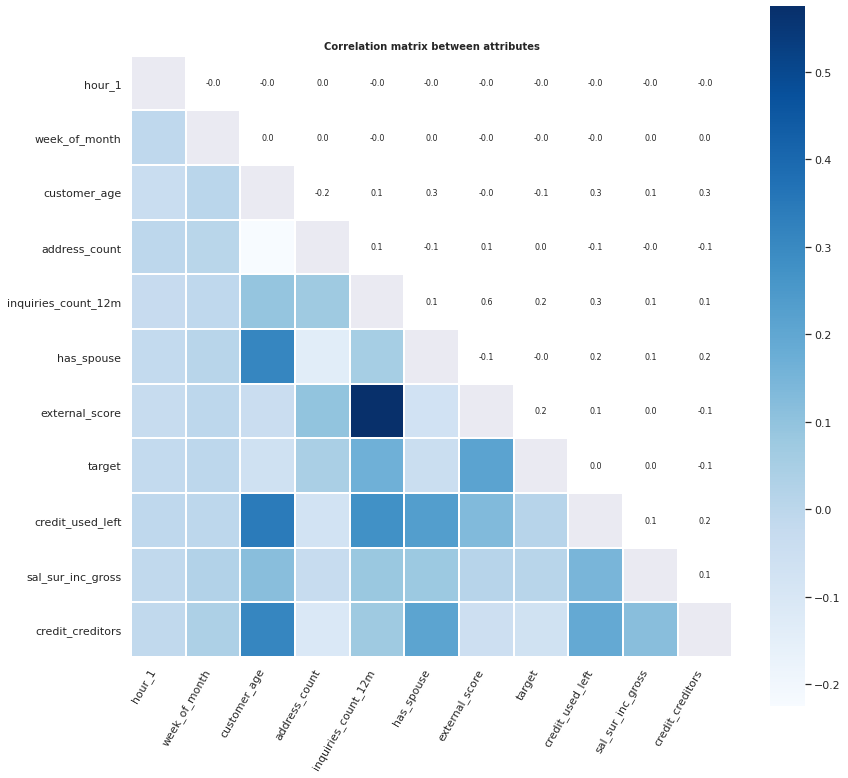

time: 1.08 s (started: 2021-06-09 23:48:45 +00:00)


In [ ]:
# All the high correlation features have been removed
correlationMatrix = df.dropna().corr(method="pearson")
plot_corr(correlationMatrix, 0.8)

### Comment
<div class="comment">
The high correlation features and it treatments:
<ul>
<li> "day" vs. "week_of_month": drop day, consider week_of_month as the binning of day.</li> 
<li> "credit_used" vs. "mortgage_house" vs. "mortgage_apartment": as ("mortgage_house" +  "mortgage_apartment") < "credit_used", drop all three, then create new "credit_used_left" = "credit_used" - ("mortgage_house" + "mortgage_apartment"). </li> 
<li> "income_gross" vs. "salary_surplus": create new feature "sal_sur_inc_gross" = "salary_surplus"/"income_gross".</li> 
<li> "creditors_count" vs. "credit_count": create new feature "credit_creditors" = "credit_count"/"creditors_count".</li> 
</ul>
</div>

### Final Check on data

In [ ]:
display(df.shape, df.head())
display(df.info())
display(df.describe(include='all').T)

(7112, 11)

,hour_1,week_of_month,customer_age,address_count,inquiries_count_12m,has_spouse,external_score,target,credit_used_left,sal_sur_inc_gross,credit_creditors
0,15,5.0,33,1,9,0,5.09026,0,426180,1.110157,1.555556
1,7,4.0,26,2,1,0,1.91298,0,128913,1.071757,1.166667
2,19,3.0,28,2,9,0,7.88086,0,53132,1.136364,1.000000
3,5,3.0,51,1,7,0,8.39190,0,488067,1.218144,1.181818
4,21,3.0,51,1,10,1,7.58904,0,1639751,0.068375,2.400000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 9368
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hour_1               7112 non-null   int64  
 1   week_of_month        7112 non-null   float64
 2   customer_age         7112 non-null   int64  
 3   address_count        7112 non-null   int64  
 4   inquiries_count_12m  7112 non-null   int64  
 5   has_spouse           7112 non-null   int64  
 6   external_score       7112 non-null   float64
 7   target               7112 non-null   int64  
 8   credit_used_left     7112 non-null   int64  
 9   sal_sur_inc_gross    7112 non-null   float64
 10  credit_creditors     7112 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 986.8 KB


None

,count,mean,std,min,25%,50%,75%,max
hour_1,7112.0,13.828740,5.348538,0.000,10.000000,14.000000,18.000000,2.300000e+01
week_of_month,7112.0,3.152700,1.098584,1.000,3.000000,3.000000,4.000000,5.000000e+00
customer_age,7112.0,32.457677,8.680644,19.000,26.000000,30.000000,36.000000,8.100000e+01
address_count,7112.0,1.476800,0.874985,1.000,1.000000,1.000000,2.000000,9.000000e+00
inquiries_count_12m,7112.0,3.818195,4.944523,0.000,1.000000,3.000000,5.000000,1.430000e+02
has_spouse,7112.0,0.210208,0.407485,0.000,0.000000,0.000000,0.000000,1.000000e+00
external_score,7112.0,3.010466,4.409433,0.013,0.543400,1.335520,3.485048,8.055190e+01
target,7112.0,0.060180,0.237837,0.000,0.000000,0.000000,0.000000,1.000000e+00
credit_used_left,7112.0,144761.274606,217718.900352,0.000,6088.750000,59377.000000,203411.500000,3.995768e+06
sal_sur_inc_gross,7112.0,1.027201,0.185362,0.000,1.003553,1.024463,1.068139,5.210526e+00


time: 136 ms (started: 2021-06-09 23:48:46 +00:00)


In [ ]:
pd.set_option('display.max_colwidth', 500) # Setting pandas to display a N number of columns

temp_df = pd.concat([df.apply(lambda col: col.nunique()), df.apply(lambda col: col.sort_values(ascending=True).unique())], axis=1)
temp_df.columns = ["no_uniques", "uniques"]
temp_df

,no_uniques,uniques
hour_1,24,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]"
week_of_month,5,"[1.0, 2.0, 3.0, 4.0, 5.0]"
customer_age,63,"[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]"
address_count,9,"[1, 2, 3, 4, 5, 6, 7, 8, 9]"
inquiries_count_12m,45,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 39, 42, 44, 53, 57, 59, 68, 103, 143]"
has_spouse,2,"[0, 1]"
external_score,6628,"[0.013000000000000001, 0.015719999999999998, 0.02085, 0.02172, 0.02194, 0.02609, 0.026510000000000002, 0.02825, 0.028919999999999998, 0.03094, 0.03217, 0.03283, 0.03322, 0.03375, 0.03415, 0.03533, 0.03663, 0.03694, 0.037160000000000006, 0.03729, 0.03756, 0.03784, 0.03812, 0.03843, 0.03852, 0.03883, 0.04086, 0.0413, 0.04131, 0.04228, 0.04292, 0.042960000000000005, 0.04426, 0.04427, 0.0453, 0.045380000000000004, 0.04556, 0.045630000000000004, 0.04577, 0.045810000000000003, 0.04595, 0.046239999..."
target,2,"[0, 1]"
credit_used_left,6074,"[0, 1, 15, 16, 18, 19, 24, 58, 75, 81, 115, 134, 138, 148, 185, 188, 193, 198, 199, 205, 207, 217, 218, 225, 228, 230, 245, 246, 247, 248, 250, 251, 253, 258, 259, 272, 278, 281, 295, 300, 307, 324, 329, 332, 334, 336, 344, 347, 352, 353, 356, 358, 359, 364, 367, 372, 377, 378, 388, 398, 400, 409, 414, 416, 417, 418, 426, 430, 431, 432, 433, 444, 447, 458, 467, 468, 471, 474, 475, 482, 485, 486, 493, 494, 499, 501, 505, 511, 514, 522, 528, 532, 534, 535, 537, 540, 541, 545, 546, 547, ...]"
sal_sur_inc_gross,6610,"[0.0, 0.003862495171881035, 0.016376122556788168, 0.021335807050092765, 0.021723122238586155, 0.022648941408173313, 0.027606098063452822, 0.03143189755529686, 0.03278688524590164, 0.06774519716885744, 0.06837483805959407, 0.08685714285714285, 0.1103202846975089, 0.11528150134048257, 0.12496831432192648, 0.13042485153037917, 0.18848260024730612, 0.18971428571428572, 0.20082273747195215, 0.21782762691853602, 0.23139318206730242, 0.24927066450567262, 0.26987050017821074, 0.2843040473840079, 0.2..."


time: 67.9 ms (started: 2021-06-09 23:48:46 +00:00)



---



<a id="Split_dummy"></a>

# Split Data and Create Dummy Variables
[Back To Table of Contents](#top_section)

<a id="Split"></a>

## Data Split
[Back To Table of Contents](#top_section)

In [ ]:
TEST_SIZE = 0.2
RAND = 42
classing = 20

# ref_col - append the column when we create the dummies variables from each feature, 
# which will be drop later to prevent dummy variable trap
ref_col = [] 

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), df['target'], 
                                                    stratify = df['target'], # stratify for keeping same distribution of target
                                                    test_size = TEST_SIZE, random_state=RAND)

org_cols = X_train.columns
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train.sum()/len(y_train), y_test.sum()/len(y_test), X_train.head(10))

(5689, 10)

(1423, 10)

(5689,)

(1423,)

0.06011601335911408

0.060435699226985246

,hour_1,week_of_month,customer_age,address_count,inquiries_count_12m,has_spouse,external_score,credit_used_left,sal_sur_inc_gross,credit_creditors
717,10,4.0,47,1,4,0,1.20658,57160,1.040741,1.000000
8936,23,4.0,28,2,1,0,0.40365,148570,1.016146,1.250000
711,19,4.0,26,1,10,0,1.81889,17727,1.017462,1.000000
1846,14,4.0,28,1,1,1,0.18294,17328,1.037940,1.666667
8628,11,4.0,30,2,8,0,7.79132,23493,1.010476,1.000000
9333,20,3.0,36,1,4,0,0.97073,15283,1.008967,2.000000
5144,17,3.0,25,1,1,0,0.33553,0,1.039883,1.000000
4321,10,4.0,29,3,6,0,8.47607,89315,1.155000,1.000000
8646,10,1.0,29,4,7,0,12.98707,43726,1.004620,1.000000
8444,19,3.0,35,1,8,1,6.87258,80159,1.037686,1.750000


time: 63.2 ms (started: 2021-06-09 23:48:47 +00:00)


<a id="bining"></a>

## Weight of Evidence Bining and Dummy Variables
[Back To Table of Contents](#top_section)

In [ ]:
def plot_by_woe(df_WoE, rota=45):
  """
    This function will plot the Feature number distribution and its equivalent WoE
    
    Parameters
    ----------
    df_WoE: the plotting input dataframe
    rota: Rotating degree of xticks - default = 45
  """
  x = np.array(df_WoE.iloc[:, 0].apply(str))
  y = df_WoE['WoE']

  plt.figure(figsize=(18, 6))
  plt.plot(x, y, marker = 'o', linestyle = '--', color = 'navy')
  plt.grid(True, linestyle='-.') 
  plt.xlabel(df_WoE.columns[0])
  plt.ylabel('Weight of Evidence')
  plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
  plt.xticks(rotation = rota)

time: 11.4 ms (started: 2021-06-09 23:48:47 +00:00)


In [ ]:
# WoE function for numerical variables
# bad = default = 1, good = no default = 0
def woe_cal(df, target_df, classing=20):
  """
    This function do fine classing on feature, then export the Weight of Evidence and Information Value 
    The fine classing will split into 20 parts as default when number of unique values of the feature > 30
    
    Parameters
    ----------
    df: the input datafame with feature
    target_df: the target output dataframe
    classing: Splitting the target features into equal parts - default = 20
  """
  # fine-classing:
  print("Number of uniques values:", df.nunique())

  if df.nunique() >=30:
    df = pd.qcut(df, q=classing, duplicates='drop')

  df = pd.concat([df, target_df], axis = 1)
  df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                  df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
  df = df.iloc[:, [0, 1, 3]]

  df.columns = [df.columns.values[0], 'n_obs', 'prop_default']
  df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
  df['n_default'] = df['prop_default'] * df['n_obs']
  df['n_nondefault'] = (1 - df['prop_default']) * df['n_obs']
  df['prop_n_default'] = df['n_default'] / df['n_default'].sum()
  df['prop_n_nondefault'] = df['n_nondefault'] / df['n_nondefault'].sum()
  df['WoE'] = np.log(df['prop_n_nondefault']/ df['prop_n_default'])
  df['diff_prop_default'] = df['prop_default'].diff().abs()
  df['diff_WoE'] = df['WoE'].diff().abs()
  df['IV'] = (df['prop_n_nondefault'] - df['prop_n_default']) * df['WoE']
  df['IV_sum'] = df['IV'].replace([np.inf, -np.inf], 0).sum()
  return df

time: 24.6 ms (started: 2021-06-09 23:48:47 +00:00)


### hour_1

Number of uniques values: 24


,hour_1,n_obs,prop_default,prop_n_obs,n_default,n_nondefault,prop_n_default,prop_n_nondefault,WoE,diff_prop_default,diff_WoE,IV,IV_sum
0,0,60,0.150000,0.010547,9.0,51.0,0.026316,0.009538,-1.014879,NaN,NaN,1.702737e-02,0.142713
1,1,34,0.088235,0.005976,3.0,31.0,0.008772,0.005798,-0.414105,0.061765,0.600774,1.231668e-03,0.142713
2,2,31,0.193548,0.005449,6.0,25.0,0.017544,0.004676,-1.322364,0.105313,0.908259,1.701663e-02,0.142713
3,3,30,0.066667,0.005273,2.0,28.0,0.005848,0.005237,-0.110423,0.126882,1.211941,6.750944e-05,0.142713
4,4,67,0.059701,0.011777,4.0,63.0,0.011696,0.011782,0.007360,0.006965,0.117783,6.359288e-07,0.142713
5,5,125,0.064000,0.021972,8.0,117.0,0.023392,0.021881,-0.066748,0.004299,0.074108,1.008148e-04,0.142713
6,6,212,0.037736,0.037265,8.0,204.0,0.023392,0.038152,0.489198,0.026264,0.555946,7.220773e-03,0.142713
7,7,258,0.050388,0.045351,13.0,245.0,0.038012,0.045820,0.186829,0.012652,0.302370,1.458831e-03,0.142713
8,8,291,0.072165,0.051151,21.0,270.0,0.061404,0.050496,-0.195581,0.021777,0.382409,2.133375e-03,0.142713
9,9,288,0.052083,0.050624,15.0,273.0,0.043860,0.051057,0.151941,0.020082,0.347522,1.093525e-03,0.142713


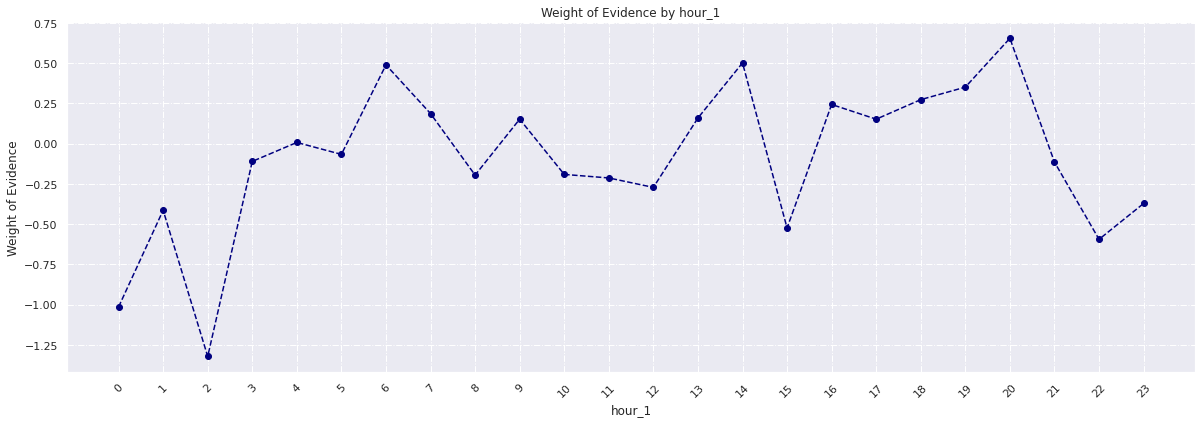

time: 628 ms (started: 2021-06-09 23:48:47 +00:00)


In [ ]:
#  Work on hour_1 feature
df_temp = woe_cal(X_train['hour_1'], y_train)
# calculate Weight of Evidence
display(df_temp) 
# plot the WoE
plot_by_woe(df_temp) 

In [ ]:
# Create dummy variables
X_train["hour_1_4"] = np.where(X_train['hour_1'].isin(range(5)), 1, 0)
X_train["hour_1_5_7"] = np.where(X_train['hour_1'].isin(range(5, 8)), 1, 0)
X_train["hour_1_8_13"] = np.where(X_train['hour_1'].isin(range(8, 14)), 1, 0)
X_train["hour_1_14_18"] = np.where(X_train['hour_1'].isin(range(14, 19)), 1, 0)
X_train["hour_1_19_"] = np.where(X_train['hour_1'] >= 19, 1, 0)
ref_col.append("hour_1_4")

time: 13.5 ms (started: 2021-06-09 23:48:47 +00:00)


### week_of_month

Number of uniques values: 5


,week_of_month,n_obs,prop_default,prop_n_obs,n_default,n_nondefault,prop_n_default,prop_n_nondefault,WoE,diff_prop_default,diff_WoE,IV,IV_sum
0,1.0,636,0.073899,0.111795,47.0,589.0,0.137427,0.110155,-0.221202,NaN,NaN,0.006033,0.045096
1,2.0,744,0.075269,0.130779,56.0,688.0,0.163743,0.128670,-0.241043,0.001369,0.019841,0.008454,0.045096
2,3.0,1724,0.044664,0.303041,77.0,1647.0,0.225146,0.308023,0.313425,0.030605,0.554468,0.025976,0.045096
3,4.0,2217,0.060442,0.389699,134.0,2083.0,0.391813,0.389564,-0.005756,0.015778,0.319181,0.000013,0.045096
4,5.0,368,0.076087,0.064686,28.0,340.0,0.081871,0.063587,-0.252739,0.015645,0.246984,0.004621,0.045096


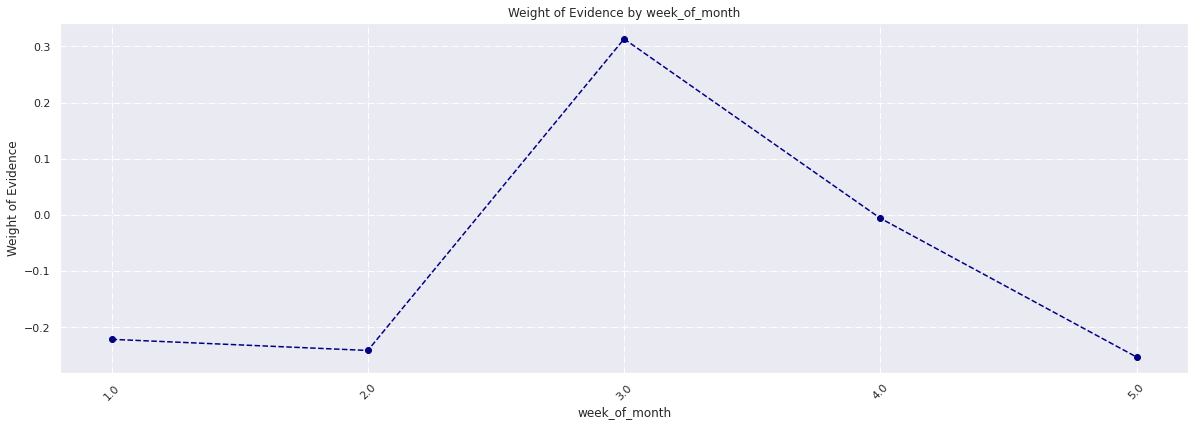

time: 363 ms (started: 2021-06-09 23:48:47 +00:00)


In [ ]:
df_temp = woe_cal(X_train['week_of_month'], y_train)
display(df_temp)
plot_by_woe(df_temp)

In [ ]:
# Create dummy variables
X_train["week_of_month_2"] = np.where(X_train['week_of_month'].isin(range(3)), 1, 0)
X_train["week_of_month_3"] = np.where(X_train['week_of_month'].isin(range(3, 4)), 1, 0)
X_train["week_of_month_4"] = np.where(X_train['week_of_month'].isin(range(4, 5)), 1, 0)
X_train["week_of_month_5"] = np.where(X_train['week_of_month'] >= 5, 1, 0)
ref_col.append("week_of_month_5")

time: 23.9 ms (started: 2021-06-09 23:48:48 +00:00)


### customer_age

Number of uniques values: 62


,customer_age,n_obs,prop_default,prop_n_obs,n_default,n_nondefault,prop_n_default,prop_n_nondefault,WoE,diff_prop_default,diff_WoE,IV,IV_sum
0,"(18.999, 22.0]",256,0.140625,0.044999,36.0,220.0,0.105263,0.041145,-0.939372,NaN,NaN,0.060231,0.299706
1,"(22.0, 23.0]",258,0.116279,0.045351,30.0,228.0,0.087719,0.042641,-0.721332,0.024346,0.218040,0.032517,0.299706
2,"(23.0, 24.0]",288,0.118056,0.050624,34.0,254.0,0.099415,0.047503,-0.738506,0.001776,0.017175,0.038337,0.299706
3,"(24.0, 25.0]",324,0.083333,0.056952,27.0,297.0,0.078947,0.055545,-0.351585,0.034722,0.386922,0.008228,0.299706
4,"(25.0, 26.0]",340,0.076471,0.059764,26.0,314.0,0.076023,0.058725,-0.258184,0.006863,0.093401,0.004466,0.299706
5,"(26.0, 27.0]",359,0.055710,0.063104,20.0,339.0,0.058480,0.063400,0.080788,0.020760,0.338971,0.000398,0.299706
6,"(27.0, 28.0]",352,0.051136,0.061874,18.0,334.0,0.052632,0.062465,0.171289,0.004574,0.090501,0.001684,0.299706
7,"(28.0, 29.0]",362,0.030387,0.063632,11.0,351.0,0.032164,0.065644,0.713411,0.020750,0.542122,0.023885,0.299706
8,"(29.0, 30.0]",321,0.056075,0.056425,18.0,303.0,0.052632,0.056667,0.073881,0.025688,0.639530,0.000298,0.299706
9,"(30.0, 31.0]",344,0.026163,0.060468,9.0,335.0,0.026316,0.062652,0.867426,0.029912,0.793545,0.031519,0.299706


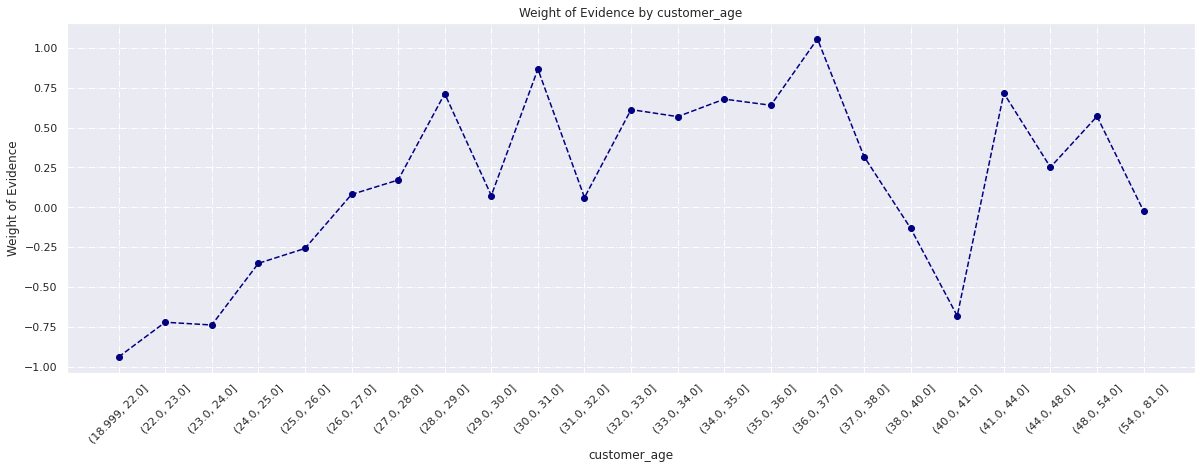

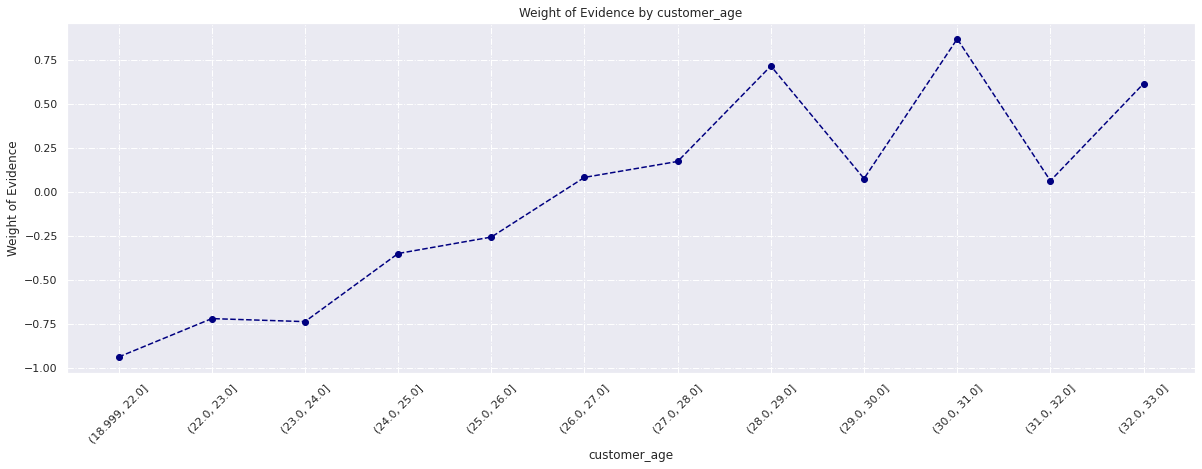

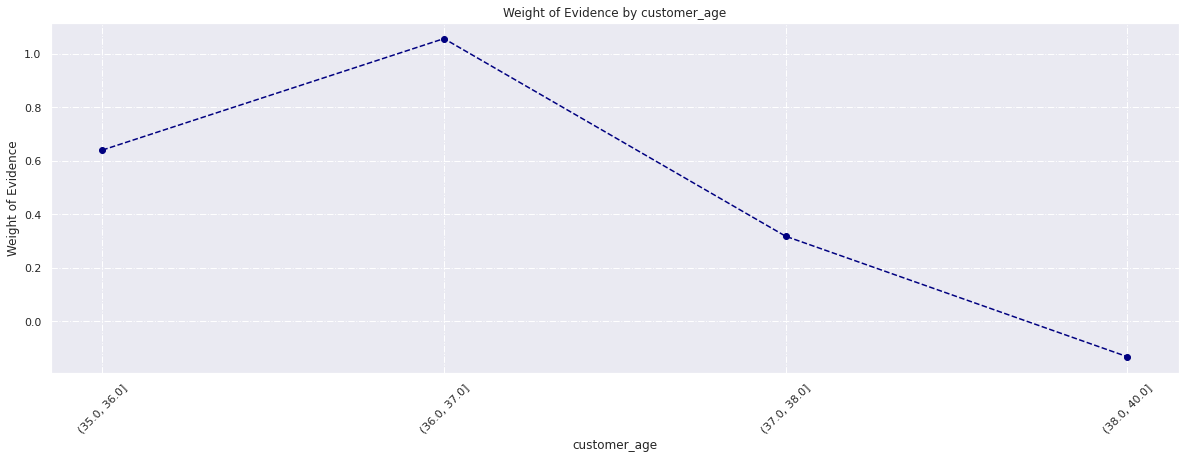

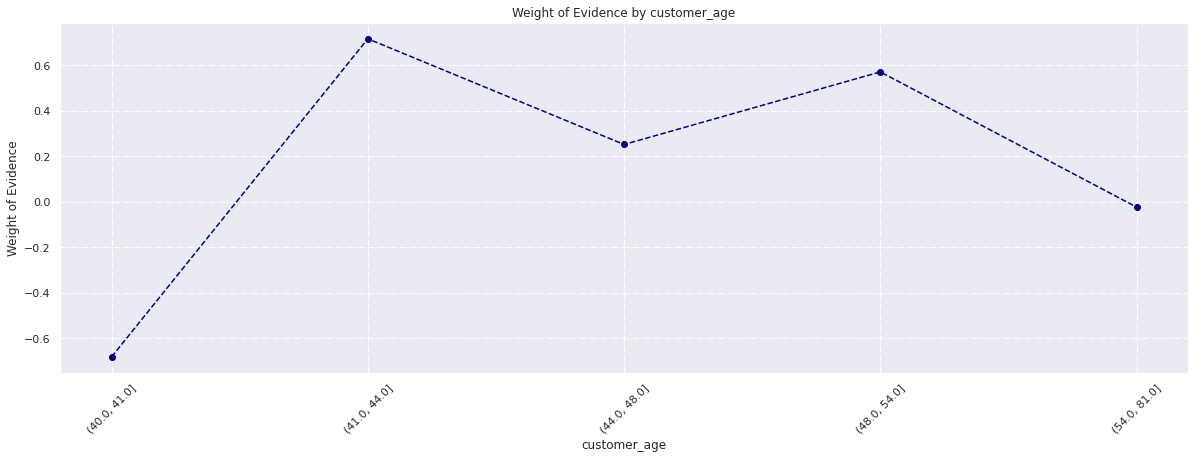

time: 1.74 s (started: 2021-06-09 23:48:48 +00:00)


In [ ]:
df_temp = woe_cal(X_train['customer_age'], y_train, classing=30)
display(df_temp)
plot_by_woe(df_temp)
plot_by_woe(df_temp[:12])
plot_by_woe(df_temp[14:18])
plot_by_woe(df_temp[18:])

In [ ]:
# Create Categorical dummy variables
X_train["customer_age_25"] = np.where(X_train['customer_age'].isin(range(26)), 1, 0)
X_train["customer_age_26_28"] = np.where(X_train['customer_age'].isin(range(26, 29)), 1, 0)
X_train["customer_age_29_34"] = np.where(X_train['customer_age'].isin(range(29, 35)), 1, 0)
X_train["customer_age_35_41"] = np.where(X_train['customer_age'].isin(range(35, 42)), 1, 0)
X_train["customer_age_42_"] = np.where(X_train['customer_age'] >= 42, 1, 0)
ref_col.append("customer_age_25")

time: 19.2 ms (started: 2021-06-09 23:48:50 +00:00)


### address_count

Number of uniques values: 9


,address_count,n_obs,prop_default,prop_n_obs,n_default,n_nondefault,prop_n_default,prop_n_nondefault,WoE,diff_prop_default,diff_WoE,IV,IV_sum
0,1,3998,0.054527,0.702760,218.0,3780.0,0.637427,0.706938,0.103504,NaN,NaN,0.007195,0.052189
1,2,1033,0.064860,0.181578,67.0,966.0,0.195906,0.180662,-0.081009,0.010332,0.184513,0.001235,0.052189
2,3,441,0.081633,0.077518,36.0,405.0,0.105263,0.075743,-0.329112,0.016773,0.248103,0.009715,0.052189
3,4,148,0.060811,0.026015,9.0,139.0,0.026316,0.025996,-0.012231,0.020822,0.316881,0.000004,0.052189
4,5,52,0.192308,0.009140,10.0,42.0,0.029240,0.007855,-1.314396,0.131497,1.302165,0.028108,0.052189
5,6,10,0.200000,0.001758,2.0,8.0,0.005848,0.001496,-1.363186,0.007692,0.048790,0.005932,0.052189
6,7,3,0.000000,0.000527,0.0,3.0,0.000000,0.000561,inf,0.200000,inf,inf,0.052189
7,8,3,0.000000,0.000527,0.0,3.0,0.000000,0.000561,inf,0.000000,NaN,inf,0.052189
8,9,1,0.000000,0.000176,0.0,1.0,0.000000,0.000187,inf,0.000000,NaN,inf,0.052189


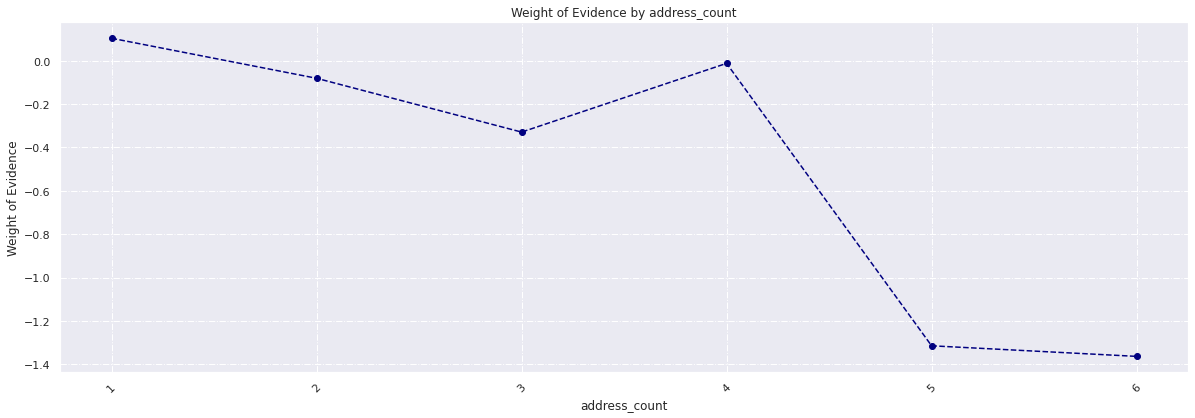

time: 368 ms (started: 2021-06-09 23:48:50 +00:00)


In [ ]:
df_temp = woe_cal(X_train['address_count'], y_train)
display(df_temp)
plot_by_woe(df_temp)

In [ ]:
# Create Categorical dummy variables
X_train["address_count_1"] = np.where(X_train['address_count'].isin(range(2)), 1, 0)
X_train["address_count_2"] = np.where(X_train['address_count'].isin(range(2, 3)), 1, 0)
X_train["address_count_3"] = np.where(X_train['address_count'].isin(range(3, 4)), 1, 0)
X_train["address_count_4"] = np.where(X_train['address_count'].isin(range(4, 5)), 1, 0)
X_train["address_count_5_"] = np.where(X_train['address_count'] >= 5, 1, 0)
ref_col.append("week_of_month_5_")

time: 16.6 ms (started: 2021-06-09 23:48:50 +00:00)


### inquiries_count_12m

Number of uniques values: 40


,inquiries_count_12m,n_obs,prop_default,prop_n_obs,n_default,n_nondefault,prop_n_default,prop_n_nondefault,WoE,diff_prop_default,diff_WoE,IV,IV_sum
0,"(-0.001, 1.0]",2010,0.033831,0.353313,68.0,1942.0,0.198830,0.363194,0.602486,NaN,NaN,0.099027,0.294768
1,"(1.0, 2.0]",804,0.050995,0.141325,41.0,763.0,0.119883,0.142697,0.174206,0.017164,0.428280,0.003974,0.294768
2,"(2.0, 3.0]",635,0.048819,0.111619,31.0,604.0,0.090643,0.112961,0.220107,0.002176,0.045901,0.004912,0.294768
3,"(3.0, 4.0]",568,0.058099,0.099842,33.0,535.0,0.096491,0.100056,0.036279,0.009280,0.183828,0.000129,0.294768
4,"(4.0, 5.0]",405,0.076543,0.071190,31.0,374.0,0.090643,0.069946,-0.259212,0.018445,0.295491,0.005365,0.294768
5,"(5.0, 6.0]",277,0.075812,0.048690,21.0,256.0,0.061404,0.047877,-0.248825,0.000731,0.010386,0.003366,0.294768
6,"(6.0, 7.0]",206,0.067961,0.036210,14.0,192.0,0.040936,0.035908,-0.131042,0.007851,0.117783,0.000659,0.294768
7,"(7.0, 9.0]",308,0.094156,0.054140,29.0,279.0,0.084795,0.052179,-0.485564,0.026195,0.354522,0.015837,0.294768
8,"(9.0, 12.0]",238,0.117647,0.041835,28.0,210.0,0.081871,0.039274,-0.734577,0.023491,0.249013,0.031291,0.294768
9,"(12.0, 103.0]",238,0.193277,0.041835,46.0,192.0,0.134503,0.035908,-1.320626,0.075630,0.586049,0.130207,0.294768


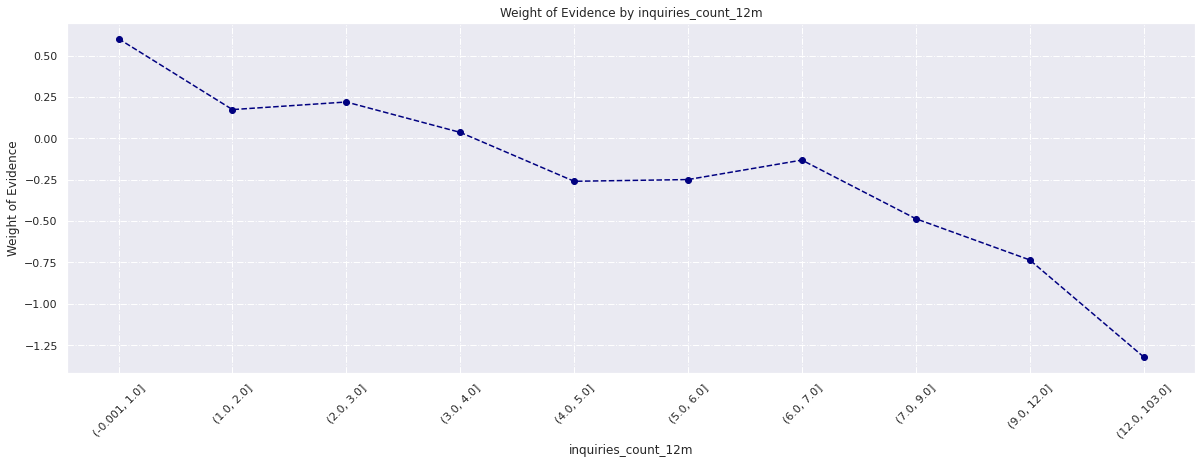

time: 434 ms (started: 2021-06-09 23:48:50 +00:00)


In [ ]:
df_temp = woe_cal(X_train['inquiries_count_12m'], y_train)
display(df_temp)
plot_by_woe(df_temp)

In [ ]:
# Create Categorical dummy variables
X_train["inquiries_count_12m_1"] = np.where(X_train['inquiries_count_12m'].isin(range(2)), 1, 0)
X_train["inquiries_count_12m_2_3"] = np.where(X_train['inquiries_count_12m'].isin(range(2, 4)), 1, 0)
X_train["inquiries_count_12m_4_5"] = np.where(X_train['inquiries_count_12m'].isin(range(4, 6)), 1, 0)
X_train["inquiries_count_12m_6_"] = np.where(X_train['inquiries_count_12m'] >= 6, 1, 0)
ref_col.append("inquiries_count_12m_6_")

time: 12 ms (started: 2021-06-09 23:48:50 +00:00)


### has_spouse

Number of uniques values: 2


,has_spouse,n_obs,prop_default,prop_n_obs,n_default,n_nondefault,prop_n_default,prop_n_nondefault,WoE,diff_prop_default,diff_WoE,IV,IV_sum
0,0,4477,0.066339,0.786957,297.0,4180.0,0.868421,0.781747,-0.105146,NaN,NaN,0.009113,0.052975
1,1,1212,0.037129,0.213043,45.0,1167.0,0.131579,0.218253,0.506049,0.02921,0.611195,0.043861,0.052975


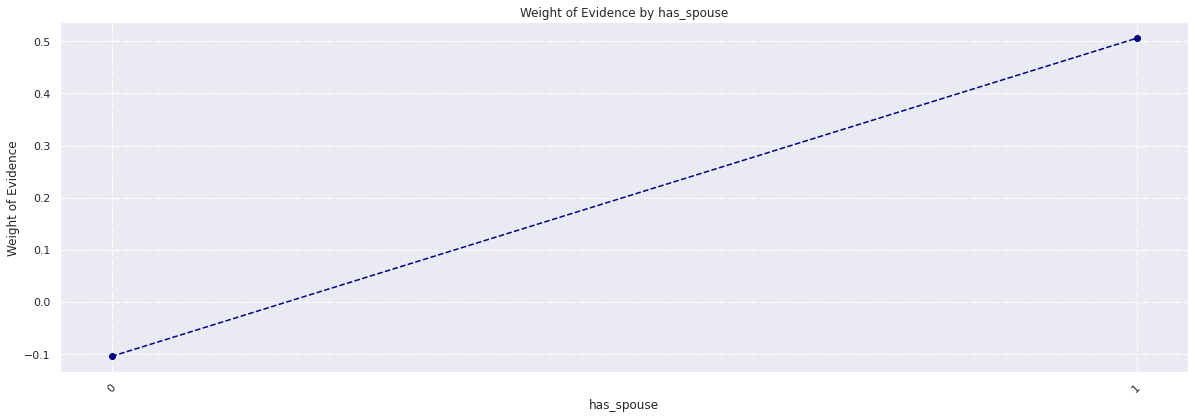

time: 354 ms (started: 2021-06-09 23:48:50 +00:00)


In [ ]:
df_temp = woe_cal(X_train['has_spouse'], y_train)
display(df_temp)
plot_by_woe(df_temp)

In [ ]:
# Create Categorical dummy variables
X_train['has_spouse_0'] = np.where(X_train['has_spouse'] == 0, 1, 0)
X_train['has_spouse_1'] = np.where(X_train['has_spouse'] == 1, 1, 0)
ref_col.append("has_spouse_0")

time: 7.34 ms (started: 2021-06-09 23:48:51 +00:00)


### external_score

Number of uniques values: 5369


,external_score,n_obs,prop_default,prop_n_obs,n_default,n_nondefault,prop_n_default,prop_n_nondefault,WoE,diff_prop_default,diff_WoE,IV,IV_sum
0,"(0.012, 0.143]",285,0.000000,0.050097,0.0,285.0,0.000000,0.053301,inf,NaN,NaN,inf,0.717245
1,"(0.143, 0.229]",284,0.014085,0.049921,4.0,280.0,0.011696,0.052366,1.499015,0.014085,inf,0.060965,0.717245
2,"(0.229, 0.32]",285,0.010526,0.050097,3.0,282.0,0.008772,0.052740,1.793815,0.003558,0.294800,0.078870,0.717245
3,"(0.32, 0.415]",284,0.031690,0.049921,9.0,275.0,0.026316,0.051431,0.670066,0.021164,1.123748,0.016829,0.717245
4,"(0.415, 0.536]",285,0.014035,0.050097,4.0,281.0,0.011696,0.052553,1.502580,0.017655,0.832514,0.061391,0.717245
5,"(0.536, 0.666]",284,0.024648,0.049921,7.0,277.0,0.020468,0.051805,0.928627,0.010613,0.573953,0.029100,0.717245
6,"(0.666, 0.799]",284,0.031690,0.049921,9.0,275.0,0.026316,0.051431,0.670066,0.007042,0.258561,0.016829,0.717245
7,"(0.799, 0.956]",285,0.017544,0.050097,5.0,280.0,0.014620,0.052366,1.275871,0.014146,0.605805,0.048159,0.717245
8,"(0.956, 1.129]",284,0.017606,0.049921,5.0,279.0,0.014620,0.052179,1.272294,0.000062,0.003578,0.047786,0.717245
9,"(1.129, 1.336]",285,0.042105,0.050097,12.0,273.0,0.035088,0.051057,0.375085,0.024500,0.897209,0.005990,0.717245


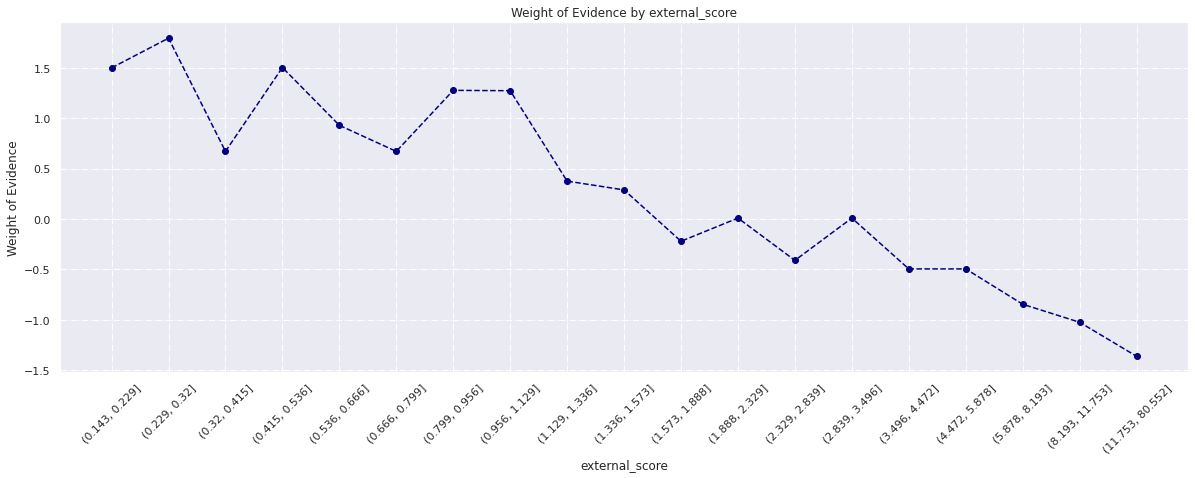

time: 617 ms (started: 2021-06-09 23:48:51 +00:00)


In [ ]:
df_temp = woe_cal(X_train['external_score'], y_train)
display(df_temp)
plot_by_woe(df_temp)

In [ ]:
# Create Categorical dummy variables
X_train["external_score_328"] = np.where((X_train['external_score'] <= 0.328), 1, 0)
X_train["external_score_329_674"] = np.where((X_train['external_score'] > 0.328) & (X_train['external_score'] <= 0.674), 1, 0)
X_train["external_score_675_1118"] = np.where((X_train['external_score'] > 0.674) & (X_train['external_score'] <= 1.118), 1, 0)
X_train["external_score_1119_1553"] = np.where((X_train['external_score'] > 1.118) & (X_train['external_score'] <= 1.553), 1, 0)
X_train["external_score_1554_3488"] = np.where((X_train['external_score'] > 1.553) & (X_train['external_score'] <= 3.488), 1, 0)
X_train["external_score_3489_"] = np.where(X_train['external_score'] >= 3.488, 1, 0)
ref_col.append("external_score_3489_")

time: 19.9 ms (started: 2021-06-09 23:48:51 +00:00)


### credit_used_left

Number of uniques values: 4875


,credit_used_left,n_obs,prop_default,prop_n_obs,n_default,n_nondefault,prop_n_default,prop_n_nondefault,WoE,diff_prop_default,diff_WoE,IV,IV_sum
0,"(-0.001, 506.92]",797,0.053952,0.140095,43.0,754.0,0.125731,0.141014,0.114712,NaN,NaN,0.001753,0.161671
1,"(506.92, 1036.16]",114,0.043860,0.020039,5.0,109.0,0.014620,0.020385,0.332430,0.010093,0.217718,0.001917,0.161671
2,"(1036.16, 1877.68]",113,0.053097,0.019863,6.0,107.0,0.017544,0.020011,0.131589,0.009238,0.200841,0.000325,0.161671
3,"(1877.68, 2690.8]",114,0.096491,0.020039,11.0,103.0,0.032164,0.019263,-0.512646,0.043394,0.644236,0.006613,0.161671
4,"(2690.8, 3800.44]",114,0.096491,0.020039,11.0,103.0,0.032164,0.019263,-0.512646,0.000000,0.000000,0.006613,0.161671
5,"(3800.44, 5052.04]",114,0.061404,0.020039,7.0,107.0,0.020468,0.020011,-0.022562,0.035088,0.490085,0.000010,0.161671
6,"(5052.04, 6580.56]",113,0.070796,0.019863,8.0,105.0,0.023392,0.019637,-0.174961,0.009393,0.152400,0.000657,0.161671
7,"(6580.56, 8427.04]",114,0.087719,0.020039,10.0,104.0,0.029240,0.019450,-0.407674,0.016923,0.232713,0.003991,0.161671
8,"(8427.04, 10110.0]",114,0.122807,0.020039,14.0,100.0,0.040936,0.018702,-0.783367,0.035088,0.375693,0.017417,0.161671
9,"(10110.0, 12632.4]",114,0.087719,0.020039,10.0,104.0,0.029240,0.019450,-0.407674,0.035088,0.375693,0.003991,0.161671


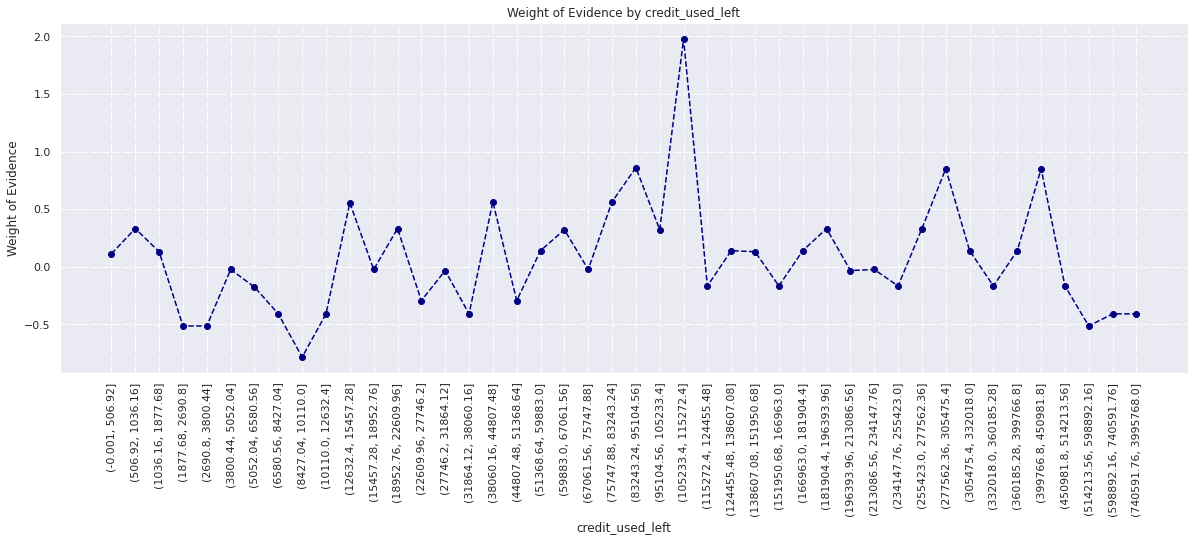

time: 1.19 s (started: 2021-06-09 23:48:51 +00:00)


In [ ]:
df_temp = woe_cal(X_train['credit_used_left'], y_train, classing=50)
display(df_temp)
plot_by_woe(df_temp, rota=90)

In [ ]:
# Create Categorical dummy variables
X_train["credit_used_left_1044"] = np.where(X_train['credit_used_left'].isin(range(1045)), 1, 0)
X_train["credit_used_left_1045_5195"] = np.where(X_train['credit_used_left'].isin(range(1045, 5196)), 1, 0)
X_train["credit_used_left_5195_12948"] = np.where(X_train['credit_used_left'].isin(range(5196, 12949)), 1, 0)
X_train["credit_used_left_12949_19607"] = np.where(X_train['credit_used_left'].isin(range(12949, 19608)), 1, 0)
X_train["credit_used_left_19608_59367"] = np.where(X_train['credit_used_left'].isin(range(19608, 59368)), 1, 0)
X_train["credit_used_left_59368_181291"] = np.where(X_train['credit_used_left'].isin(range(59368, 181292)), 1, 0)
X_train["credit_used_left_181292_251509"] = np.where(X_train['credit_used_left'].isin(range(181292, 251510)), 1, 0)
X_train["credit_used_left_251510_323982"] = np.where(X_train['credit_used_left'].isin(range(251510, 323983)), 1, 0)
X_train["credit_used_left_323983_"] = np.where(X_train['credit_used_left'] >= 323983, 1, 0)
ref_col.append("credit_used_left_323983_")

time: 77.6 ms (started: 2021-06-09 23:48:53 +00:00)


### sal_sur_inc_gross

Number of uniques values: 5308


,sal_sur_inc_gross,n_obs,prop_default,prop_n_obs,n_default,n_nondefault,prop_n_default,prop_n_nondefault,WoE,diff_prop_default,diff_WoE,IV,IV_sum
0,"(-0.0001, 0.85]",228,0.057018,0.040077,13.0,215.0,0.038012,0.040209,0.056208,NaN,NaN,0.000124,0.207613
1,"(0.85, 0.9941]",228,0.035088,0.040077,8.0,220.0,0.023392,0.041145,0.564706,0.021930,0.508497,0.010025,0.207613
2,"(0.9941, 1.0]",353,0.082153,0.062050,29.0,324.0,0.084795,0.060595,-0.336033,0.047065,0.900738,0.008132,0.207613
3,"(1.0, 1.0005]",102,0.029412,0.017929,3.0,99.0,0.008772,0.018515,0.747027,0.052741,1.083060,0.007278,0.207613
4,"(1.0005, 1.0015]",227,0.096916,0.039902,22.0,205.0,0.064327,0.038339,-0.517513,0.067505,1.264540,0.013449,0.207613
5,"(1.0015, 1.003]",228,0.078947,0.040077,18.0,210.0,0.052632,0.039274,-0.292744,0.017969,0.224768,0.003910,0.207613
6,"(1.003, 1.0052]",227,0.088106,0.039902,20.0,207.0,0.058480,0.038713,-0.412494,0.009158,0.119749,0.008153,0.207613
7,"(1.0052, 1.0075]",229,0.061135,0.040253,14.0,215.0,0.040936,0.040209,-0.017899,0.026970,0.394594,0.000013,0.207613
8,"(1.0075, 1.0107]",226,0.044248,0.039726,10.0,216.0,0.029240,0.040396,0.323213,0.016888,0.341113,0.003606,0.207613
9,"(1.0107, 1.0142]",228,0.057018,0.040077,13.0,215.0,0.038012,0.040209,0.056208,0.012770,0.267005,0.000124,0.207613


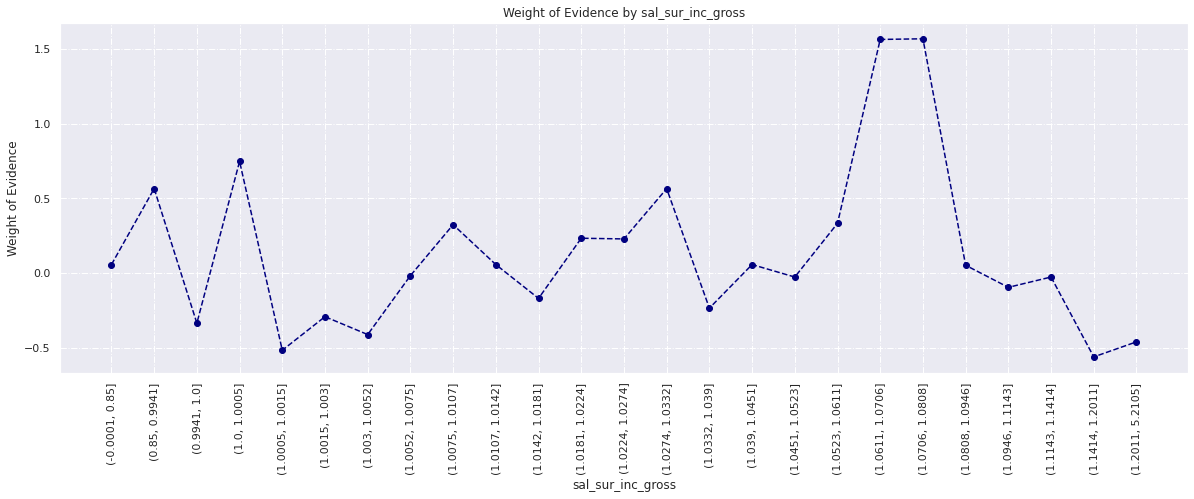

time: 651 ms (started: 2021-06-09 23:48:53 +00:00)


In [ ]:
df_temp = woe_cal(X_train['sal_sur_inc_gross'], y_train, classing=25)
display(df_temp)
plot_by_woe(df_temp, 90)

In [ ]:
# Create Categorical dummy variables
X_train["sal_sur_inc_gross_0996"] = np.where((X_train['sal_sur_inc_gross'] <= 0.996), 1, 0)
X_train["sal_sur_inc_gross_0997_1001"] = np.where((X_train['sal_sur_inc_gross'] > 0.996) & (X_train['sal_sur_inc_gross'] <= 1.001), 1, 0)
X_train["sal_sur_inc_gross_1002_1022"] = np.where((X_train['sal_sur_inc_gross'] > 1.001) & (X_train['sal_sur_inc_gross'] <= 1.022), 1, 0)
X_train["sal_sur_inc_gross_1023_1053"] = np.where((X_train['sal_sur_inc_gross'] > 1.022) & (X_train['sal_sur_inc_gross'] <= 1.053), 1, 0)
X_train["sal_sur_inc_gross_1054_1071"] = np.where((X_train['sal_sur_inc_gross'] > 1.053) & (X_train['sal_sur_inc_gross'] <= 1.071), 1, 0)
X_train["sal_sur_inc_gross_1072_1095"] = np.where((X_train['sal_sur_inc_gross'] > 1.071) & (X_train['sal_sur_inc_gross'] <= 1.095), 1, 0)
X_train["sal_sur_inc_gross_1096_"] = np.where((X_train['sal_sur_inc_gross'] > 1.095), 1, 0)
ref_col.append("sal_sur_inc_gross_1096_")

time: 35.7 ms (started: 2021-06-09 23:48:53 +00:00)


### credit_creditors

Number of uniques values: 81


,credit_creditors,n_obs,prop_default,prop_n_obs,n_default,n_nondefault,prop_n_default,prop_n_nondefault,WoE,diff_prop_default,diff_WoE,IV,IV_sum
0,"(-0.001, 1.0]",2856,0.075280,0.502021,215.0,2641.0,0.628655,0.493922,-0.241205,NaN,NaN,0.032498,0.216044
1,"(1.0, 1.125]",71,0.112676,0.012480,8.0,63.0,0.023392,0.011782,-0.685787,0.037396,0.444582,0.007962,0.216044
2,"(1.125, 1.167]",163,0.055215,0.028652,9.0,154.0,0.026316,0.028801,0.090248,0.057461,0.776035,0.000224,0.216044
3,"(1.167, 1.2]",185,0.059459,0.032519,11.0,174.0,0.032164,0.032542,0.011680,0.004245,0.078568,0.000004,0.216044
4,"(1.2, 1.25]",287,0.062718,0.050448,18.0,269.0,0.052632,0.050309,-0.045141,0.003258,0.056820,0.000105,0.216044
5,"(1.25, 1.286]",51,0.098039,0.008965,5.0,46.0,0.014620,0.008603,-0.530277,0.035321,0.485136,0.003191,0.216044
6,"(1.286, 1.333]",317,0.041009,0.055722,13.0,304.0,0.038012,0.056854,0.402598,0.057030,0.932875,0.007586,0.216044
7,"(1.333, 1.4]",167,0.041916,0.029355,7.0,160.0,0.020468,0.029923,0.379783,0.000907,0.022815,0.003591,0.216044
8,"(1.4, 1.5]",432,0.055556,0.075936,24.0,408.0,0.070175,0.076304,0.083733,0.013639,0.296050,0.000513,0.216044
9,"(1.5, 1.571]",50,0.020000,0.008789,1.0,49.0,0.002924,0.009164,1.142340,0.035556,1.058607,0.007128,0.216044


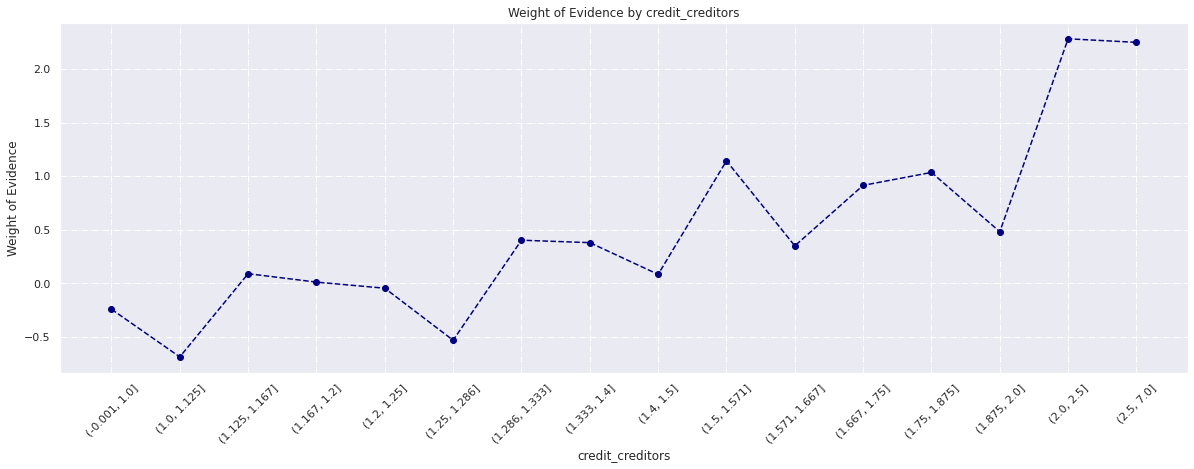

time: 1.06 s (started: 2021-06-09 23:48:53 +00:00)


In [ ]:
df_temp = woe_cal(X_train['credit_creditors'], y_train, 35)
display(df_temp)
plot_by_woe(df_temp)

In [ ]:
# Create Categorical dummy variables
X_train["credit_creditors_112"] = np.where((X_train['credit_creditors'] <= 1.125), 1, 0)
X_train["credit_creditors_113_128"] = np.where((X_train['credit_creditors'] > 1.125) & (X_train['credit_creditors'] <= 1.286), 1, 0)
X_train["credit_creditors_129_150"] = np.where((X_train['credit_creditors'] > 1.286) & (X_train['credit_creditors'] <= 1.5), 1, 0)
X_train["credit_creditors_151_173"] = np.where((X_train['credit_creditors'] > 1.5) & (X_train['credit_creditors'] <= 1.731), 1, 0)
X_train["credit_creditors_174_"] = np.where((X_train['credit_creditors'] > 1.731), 1, 0)
ref_col.append("credit_creditors_112")

time: 17.4 ms (started: 2021-06-09 23:48:55 +00:00)


### Update the columns and X_test set

In [ ]:
# update the final new features of X_train
selected_cols = np.setdiff1d(X_train.columns, org_cols)
selected_cols = np.setdiff1d(selected_cols, ref_col)
display(len(selected_cols))
selected_cols

43

array(['address_count_1', 'address_count_2', 'address_count_3',
       'address_count_4', 'address_count_5_', 'credit_creditors_113_128',
       'credit_creditors_129_150', 'credit_creditors_151_173',
       'credit_creditors_174_', 'credit_used_left_1044',
       'credit_used_left_1045_5195', 'credit_used_left_12949_19607',
       'credit_used_left_181292_251509', 'credit_used_left_19608_59367',
       'credit_used_left_251510_323982', 'credit_used_left_5195_12948',
       'credit_used_left_59368_181291', 'customer_age_26_28',
       'customer_age_29_34', 'customer_age_35_41', 'customer_age_42_',
       'external_score_1119_1553', 'external_score_1554_3488',
       'external_score_328', 'external_score_329_674',
       'external_score_675_1118', 'has_spouse_1', 'hour_1_14_18',
       'hour_1_19_', 'hour_1_5_7', 'hour_1_8_13', 'inquiries_count_12m_1',
       'inquiries_count_12m_2_3', 'inquiries_count_12m_4_5',
       'sal_sur_inc_gross_0996', 'sal_sur_inc_gross_0997_1001',
       'sal

time: 12.4 ms (started: 2021-06-09 23:48:55 +00:00)


In [ ]:
display(X_train.shape)
display(X_train[selected_cols].head())

(5689, 62)

,address_count_1,address_count_2,address_count_3,address_count_4,address_count_5_,credit_creditors_113_128,credit_creditors_129_150,credit_creditors_151_173,credit_creditors_174_,credit_used_left_1044,credit_used_left_1045_5195,credit_used_left_12949_19607,credit_used_left_181292_251509,credit_used_left_19608_59367,credit_used_left_251510_323982,credit_used_left_5195_12948,credit_used_left_59368_181291,customer_age_26_28,customer_age_29_34,customer_age_35_41,customer_age_42_,external_score_1119_1553,external_score_1554_3488,external_score_328,external_score_329_674,external_score_675_1118,has_spouse_1,hour_1_14_18,hour_1_19_,hour_1_5_7,hour_1_8_13,inquiries_count_12m_1,inquiries_count_12m_2_3,inquiries_count_12m_4_5,sal_sur_inc_gross_0996,sal_sur_inc_gross_0997_1001,sal_sur_inc_gross_1002_1022,sal_sur_inc_gross_1023_1053,sal_sur_inc_gross_1054_1071,sal_sur_inc_gross_1072_1095,week_of_month_2,week_of_month_3,week_of_month_4
717,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
8936,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
711,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1846,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
8628,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


time: 86.7 ms (started: 2021-06-09 23:48:55 +00:00)


In [ ]:
def DataPrepreprocess(df_temp):
  """
    This function will create the dummy variables on the input df_temp dataframe
  """
  df_temp["hour_1_4"] = np.where(df_temp['hour_1'].isin(range(5)), 1, 0)
  df_temp["hour_1_5_7"] = np.where(df_temp['hour_1'].isin(range(5, 8)), 1, 0)
  df_temp["hour_1_8_13"] = np.where(df_temp['hour_1'].isin(range(8, 14)), 1, 0)
  df_temp["hour_1_14_18"] = np.where(df_temp['hour_1'].isin(range(14, 19)), 1, 0)
  df_temp["hour_1_19_"] = np.where(df_temp['hour_1'] >= 19, 1, 0)

  df_temp["week_of_month_2"] = np.where(df_temp['week_of_month'].isin(range(3)), 1, 0)
  df_temp["week_of_month_3"] = np.where(df_temp['week_of_month'].isin(range(3, 4)), 1, 0)
  df_temp["week_of_month_4"] = np.where(df_temp['week_of_month'].isin(range(4, 5)), 1, 0)
  df_temp["week_of_month_5"] = np.where(df_temp['week_of_month'] >= 5, 1, 0)

  df_temp["customer_age_25"] = np.where(df_temp['customer_age'].isin(range(26)), 1, 0)
  df_temp["customer_age_26_28"] = np.where(df_temp['customer_age'].isin(range(26, 29)), 1, 0)
  df_temp["customer_age_29_34"] = np.where(df_temp['customer_age'].isin(range(29, 35)), 1, 0)
  df_temp["customer_age_35_41"] = np.where(df_temp['customer_age'].isin(range(35, 42)), 1, 0)
  df_temp["customer_age_42_"] = np.where(df_temp['customer_age'] >= 42, 1, 0)

  df_temp["address_count_1"] = np.where(df_temp['address_count'].isin(range(2)), 1, 0)
  df_temp["address_count_2"] = np.where(df_temp['address_count'].isin(range(2, 3)), 1, 0)
  df_temp["address_count_3"] = np.where(df_temp['address_count'].isin(range(3, 4)), 1, 0)
  df_temp["address_count_4"] = np.where(df_temp['address_count'].isin(range(4, 5)), 1, 0)
  df_temp["address_count_5_"] = np.where(df_temp['address_count'] >= 5, 1, 0)

  df_temp["inquiries_count_12m_1"] = np.where(df_temp['inquiries_count_12m'].isin(range(2)), 1, 0)
  df_temp["inquiries_count_12m_2_3"] = np.where(df_temp['inquiries_count_12m'].isin(range(2, 4)), 1, 0)
  df_temp["inquiries_count_12m_4_5"] = np.where(df_temp['inquiries_count_12m'].isin(range(4, 6)), 1, 0)
  df_temp["inquiries_count_12m_6_"] = np.where(df_temp['inquiries_count_12m'] >= 6, 1, 0)

  df_temp['has_spouse_0'] = np.where(df_temp['has_spouse'] == 0, 1, 0)
  df_temp['has_spouse_1'] = np.where(df_temp['has_spouse'] == 1, 1, 0)

  df_temp["external_score_328"] = np.where((df_temp['external_score'] <= 0.328), 1, 0)
  df_temp["external_score_329_674"] = np.where((df_temp['external_score'] > 0.328) & (df_temp['external_score'] <= 0.674), 1, 0)
  df_temp["external_score_675_1118"] = np.where((df_temp['external_score'] > 0.674) & (df_temp['external_score'] <= 1.118), 1, 0)
  df_temp["external_score_1119_1553"] = np.where((df_temp['external_score'] > 1.118) & (df_temp['external_score'] <= 1.553), 1, 0)
  df_temp["external_score_1554_3488"] = np.where((df_temp['external_score'] > 1.553) & (df_temp['external_score'] <= 3.488), 1, 0)
  df_temp["external_score_3489_"] = np.where(df_temp['external_score'] >= 3.488, 1, 0)

  df_temp["credit_used_left_1044"] = np.where(df_temp['credit_used_left'].isin(range(1045)), 1, 0)
  df_temp["credit_used_left_1045_5195"] = np.where(df_temp['credit_used_left'].isin(range(1045, 5196)), 1, 0)
  df_temp["credit_used_left_5195_12948"] = np.where(df_temp['credit_used_left'].isin(range(5196, 12949)), 1, 0)
  df_temp["credit_used_left_12949_19607"] = np.where(df_temp['credit_used_left'].isin(range(12949, 19608)), 1, 0)
  df_temp["credit_used_left_19608_59367"] = np.where(df_temp['credit_used_left'].isin(range(19608, 59368)), 1, 0)
  df_temp["credit_used_left_59368_181291"] = np.where(df_temp['credit_used_left'].isin(range(59368, 181292)), 1, 0)
  df_temp["credit_used_left_181292_251509"] = np.where(df_temp['credit_used_left'].isin(range(181292, 251510)), 1, 0)
  df_temp["credit_used_left_251510_323982"] = np.where(df_temp['credit_used_left'].isin(range(251510, 323983)), 1, 0)
  df_temp["credit_used_left_323983_"] = np.where(df_temp['credit_used_left'] >= 323983, 1, 0)

  df_temp["sal_sur_inc_gross_0996"] = np.where((df_temp['sal_sur_inc_gross'] <= 0.996), 1, 0)
  df_temp["sal_sur_inc_gross_0997_1001"] = np.where((df_temp['sal_sur_inc_gross'] > 0.996) & (df_temp['sal_sur_inc_gross'] <= 1.001), 1, 0)
  df_temp["sal_sur_inc_gross_1002_1022"] = np.where((df_temp['sal_sur_inc_gross'] > 1.001) & (df_temp['sal_sur_inc_gross'] <= 1.022), 1, 0)
  df_temp["sal_sur_inc_gross_1023_1053"] = np.where((df_temp['sal_sur_inc_gross'] > 1.022) & (df_temp['sal_sur_inc_gross'] <= 1.053), 1, 0)
  df_temp["sal_sur_inc_gross_1054_1071"] = np.where((df_temp['sal_sur_inc_gross'] > 1.053) & (df_temp['sal_sur_inc_gross'] <= 1.071), 1, 0)
  df_temp["sal_sur_inc_gross_1072_1095"] = np.where((df_temp['sal_sur_inc_gross'] > 1.071) & (df_temp['sal_sur_inc_gross'] <= 1.095), 1, 0)
  df_temp["sal_sur_inc_gross_1096_"] = np.where((df_temp['sal_sur_inc_gross'] > 1.095), 1, 0)

  df_temp["credit_creditors_112"] = np.where((df_temp['credit_creditors'] <= 1.125), 1, 0)
  df_temp["credit_creditors_113_128"] = np.where((df_temp['credit_creditors'] > 1.125) & (df_temp['credit_creditors'] <= 1.286), 1, 0)
  df_temp["credit_creditors_129_150"] = np.where((df_temp['credit_creditors'] > 1.286) & (df_temp['credit_creditors'] <= 1.5), 1, 0)
  df_temp["credit_creditors_151_173"] = np.where((df_temp['credit_creditors'] > 1.5) & (df_temp['credit_creditors'] <= 1.731), 1, 0)
  df_temp["credit_creditors_174_"] = np.where((df_temp['credit_creditors'] > 1.731), 1, 0)
  
  return df_temp

time: 157 ms (started: 2021-06-09 23:48:55 +00:00)


In [ ]:
X_test = DataPrepreprocess(X_test)
display(X_test.shape)
display(X_test[selected_cols].head())

(1423, 62)

,address_count_1,address_count_2,address_count_3,address_count_4,address_count_5_,credit_creditors_113_128,credit_creditors_129_150,credit_creditors_151_173,credit_creditors_174_,credit_used_left_1044,credit_used_left_1045_5195,credit_used_left_12949_19607,credit_used_left_181292_251509,credit_used_left_19608_59367,credit_used_left_251510_323982,credit_used_left_5195_12948,credit_used_left_59368_181291,customer_age_26_28,customer_age_29_34,customer_age_35_41,customer_age_42_,external_score_1119_1553,external_score_1554_3488,external_score_328,external_score_329_674,external_score_675_1118,has_spouse_1,hour_1_14_18,hour_1_19_,hour_1_5_7,hour_1_8_13,inquiries_count_12m_1,inquiries_count_12m_2_3,inquiries_count_12m_4_5,sal_sur_inc_gross_0996,sal_sur_inc_gross_0997_1001,sal_sur_inc_gross_1002_1022,sal_sur_inc_gross_1023_1053,sal_sur_inc_gross_1054_1071,sal_sur_inc_gross_1072_1095,week_of_month_2,week_of_month_3,week_of_month_4
8820,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1215,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
9281,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1013,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
7013,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


time: 152 ms (started: 2021-06-09 23:48:55 +00:00)


## Comment
<div class="comment">
<ul>
<li> This section turn the features into categorical variable - via fine-classing/ coarse classing methods (bining into small different categories). </li> 
<li> Bining that create dummy variables and drop the one the have relatively lowest WoE value to avoid Dummy trap. </li> 
<li> Apply the transform on X_train set to X_test set.</li> 
</ul>
</div>



---



<a id="PD_model"></a>
# PD Model
[Back To Table of Contents](#top_section)

<a id="logistics"></a>

## The Logistic Regression Model Train and Fine Tunning
[Back To Table of Contents](#top_section)

In [ ]:
# class_weight for imbalanced classification problem
reg = LogisticRegression(class_weight={0:6, 1:94}, random_state=RAND, n_jobs=-1)
reg.fit(X_train[selected_cols], y_train)

Y_train_preds = reg.predict_proba(X_train[selected_cols])[:, 1]
y_test_preds = reg.predict_proba(X_test[selected_cols])[:, 1]

print(reg)
print('AUC for train: %.3f: test: %.3f' % (roc_auc_score(y_train, Y_train_preds, average='macro'), 
                                           roc_auc_score(y_test, y_test_preds, average='macro')))

LogisticRegression(C=1.0, class_weight={0: 6, 1: 94}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for train: 0.785: test: 0.821
time: 1.24 s (started: 2021-06-09 23:48:55 +00:00)


In [ ]:
# calculate roc_auc_score_
def roc_auc_score_(y_true, y_pred):
  return roc_auc_score(y_true, y_pred, average='macro')

# define weight hyperparameter
param_grid = {"C": np.linspace(0.1, 1.99, 20), 
              "class_weight": [{0:x, 1:1.0-x} for x in np.linspace(0.0, 0.99, 100)],
              }

# Stratified K-Folds Cross-Validation for avoid overfitting/ data leakage 
# maintain the same class distribution on each split of data
skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=RAND)

# GrivSearchCV to find best parameters 
grid_cv_auc = GridSearchCV(estimator=LogisticRegression(max_iter=200, random_state=RAND, n_jobs=-1), 
                           param_grid=param_grid, 
                           n_jobs=-1, cv=skf, 
                           scoring=make_scorer(roc_auc_score_, greater_is_better=True, needs_proba=True),
                           refit=True, return_train_score=True)

grid_cv_auc.fit(X_train[selected_cols], y_train)
Y_train_preds = grid_cv_auc.predict_proba(X_train[selected_cols])[:, 1]
y_test_preds = grid_cv_auc.predict_proba(X_test[selected_cols])[:, 1]

print(grid_cv_auc.best_estimator_)
print('AUC for train: %.3f: test: %.3f' % (roc_auc_score(y_train, Y_train_preds, average='macro'),
                                           roc_auc_score(y_test, y_test_preds, average='macro')))

LogisticRegression(C=1.3931578947368422, class_weight={0: 0.36, 1: 0.64},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=200, multi_class='auto', n_jobs=-1,
                   penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)
AUC for train: 0.785: test: 0.828
time: 40min 29s (started: 2021-06-09 23:48:56 +00:00)


In [ ]:
final_m = grid_cv_auc.best_estimator_
final_m

LogisticRegression(C=1.3931578947368422, class_weight={0: 0.36, 1: 0.64},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=200, multi_class='auto', n_jobs=-1,
                   penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

time: 6.27 ms (started: 2021-06-10 00:29:26 +00:00)


<a id="cal_p_values"></a>

## Calculate the p_values and choose final features
[Back To Table of Contents](#top_section)

In [ ]:
def p_val(df, model):
  """
    This function will return p_values for the model
    
    Parameters
    ----------
    df: the input dataframe
    model: model that return
  """
  denom = (2.0 * (1.0 + np.cosh(model.decision_function(df))))
  denom = np.tile(denom,(df.shape[1],1)).T
  F_ij = np.dot((df / denom).T, df) ## Fisher Information Matrix
  # Inverse Information Matrix
  Cramer_Rao = np.linalg.inv(F_ij) 
  sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
  # z-score for eaach model coefficient
  z_scores = model.coef_[0] / sigma_estimates 
  # two tailed test for p-values
  p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
  return p_values

time: 18.4 ms (started: 2021-06-10 00:29:26 +00:00)


In [ ]:
# Create the table calculation of coefficients and its p_values 
summary_table = pd.DataFrame(columns = ["Feature name"], 
                             data = np.insert(selected_cols, 0, "Intercept"))
summary_table["Coefficients"] = np.append(final_m.intercept_[0], np.transpose(final_m.coef_))
p_values = p_val(X_train[selected_cols], final_m)
summary_table["p_values"] = np.append(np.nan, np.array(p_values))
summary_table["p_values<0.05"] = summary_table["p_values"] < 0.05
summary_table

,Feature name,Coefficients,p_values,p_values<0.05
0,Intercept,0.280817,NaN,False
1,address_count_1,-0.088201,7.851115e-01,False
2,address_count_2,-0.072452,8.300269e-01,False
3,address_count_3,-0.089089,7.982728e-01,False
4,address_count_4,-0.331354,4.327147e-01,False
5,address_count_5_,0.580539,1.749563e-01,False
6,credit_creditors_113_128,-0.047440,7.676243e-01,False
7,credit_creditors_129_150,-0.184915,2.227979e-01,False
8,credit_creditors_151_173,-0.370086,1.441138e-01,False
9,credit_creditors_174_,-0.527123,7.929525e-03,True


time: 105 ms (started: 2021-06-10 00:29:26 +00:00)


In [ ]:
# Group the Dummy Features into the group of their same original feature
summary_table["feature_group"] = 0
for x in range(1, len(summary_table)):
  # SequenceMatcher match the features have similar name into same group
  if SequenceMatcher(None, summary_table["Feature name"][x-1], summary_table["Feature name"][x]).ratio() > 0.65:
    summary_table["feature_group"][x] = summary_table["feature_group"][x-1] # if feature name similar, assign to previous group number
  else:
    summary_table["feature_group"][x] = summary_table["feature_group"][x-1] + 1 # if not, assign to new group number

# temp datafame - reference for grouping feature
temp = pd.DataFrame(data=summary_table.groupby("feature_group")["p_values<0.05"].sum()).reset_index(drop=True).rename(columns={"p_values<0.05":"Bol"})

# Select the feature to be kept or removed - feature will be remove if all of the dummy features in the same group have p_values>0.05
summary_table["feature_keep"] = True
for x in range(0, len(summary_table)):
  if temp["Bol"][summary_table["feature_group"][x]] == 0:
    summary_table["feature_keep"][x] = False

summary_table

,Feature name,Coefficients,p_values,p_values<0.05,feature_group,feature_keep
0,Intercept,0.280817,NaN,False,0,False
1,address_count_1,-0.088201,7.851115e-01,False,1,False
2,address_count_2,-0.072452,8.300269e-01,False,1,False
3,address_count_3,-0.089089,7.982728e-01,False,1,False
4,address_count_4,-0.331354,4.327147e-01,False,1,False
5,address_count_5_,0.580539,1.749563e-01,False,1,False
6,credit_creditors_113_128,-0.047440,7.676243e-01,False,2,True
7,credit_creditors_129_150,-0.184915,2.227979e-01,False,2,True
8,credit_creditors_151_173,-0.370086,1.441138e-01,False,2,True
9,credit_creditors_174_,-0.527123,7.929525e-03,True,2,True


time: 68.1 ms (started: 2021-06-10 00:29:26 +00:00)


In [ ]:
# pick out the final features to keep
final_selected_cols = summary_table.loc[summary_table['feature_keep'] == True, "Feature name"].values
print(len(final_selected_cols))
final_selected_cols

37


array(['credit_creditors_113_128', 'credit_creditors_129_150',
       'credit_creditors_151_173', 'credit_creditors_174_',
       'credit_used_left_1044', 'credit_used_left_1045_5195',
       'credit_used_left_12949_19607', 'credit_used_left_181292_251509',
       'credit_used_left_19608_59367', 'credit_used_left_251510_323982',
       'credit_used_left_5195_12948', 'credit_used_left_59368_181291',
       'customer_age_26_28', 'customer_age_29_34', 'customer_age_35_41',
       'customer_age_42_', 'external_score_1119_1553',
       'external_score_1554_3488', 'external_score_328',
       'external_score_329_674', 'external_score_675_1118',
       'hour_1_14_18', 'hour_1_19_', 'hour_1_5_7', 'hour_1_8_13',
       'inquiries_count_12m_1', 'inquiries_count_12m_2_3',
       'inquiries_count_12m_4_5', 'sal_sur_inc_gross_0996',
       'sal_sur_inc_gross_0997_1001', 'sal_sur_inc_gross_1002_1022',
       'sal_sur_inc_gross_1023_1053', 'sal_sur_inc_gross_1054_1071',
       'sal_sur_inc_gross_1072

time: 12.3 ms (started: 2021-06-10 00:39:09 +00:00)


<a id="final_PD"></a>

## Final PD Model
[Back To Table of Contents](#top_section)

In [ ]:
final_m.fit(X_train[final_selected_cols], y_train)

LogisticRegression(C=1.3931578947368422, class_weight={0: 0.36, 1: 0.64},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=200, multi_class='auto', n_jobs=-1,
                   penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

time: 921 ms (started: 2021-06-10 00:39:10 +00:00)


In [ ]:
Y_train_preds = final_m.predict_proba(X_train[final_selected_cols])[:, 1]
y_test_preds = final_m.predict_proba(X_test[final_selected_cols])[:, 1]

print('AUC for train: %.3f: test: %.3f' % (roc_auc_score(y_train, Y_train_preds, average='macro'),
                                           roc_auc_score(y_test, y_test_preds, average='macro')))

AUC for train: 0.782: test: 0.829
time: 28.3 ms (started: 2021-06-10 00:39:11 +00:00)


## Comment
<div class="comment">
The Logistic model was train with following strategy:
<ul>
<li> Train a base line model with class_weight = {0:6, 1:94}, which is revert of the dataset classes distribution. The class_weight hyperparamter is used to penalty on the Loss Function due to the imbalanced data</li> 
<li> The Logistic model's hyper-parameters optimization via GridSearchCV: </li> 
  <ul>
  <li> Hyperparameters tunning on C and class_weight.</li> 
  <li> RepeatedStratifiedKFold Cross-Validation was used to avoid overfitting/ data leakage.</li> 
  <li> The training task will focus on maximizing the roc_auc_score while fine-tuning the hyperparameters.</li> 
  </ul>
<li> Calculate the p_values of each coefficient output from the best performance model and only keep the statistically significant ones (p_values < 0.05). Note that, only the features, which got all dummies variables are statistically non-significant, will be removed.</li> 
<li> The "address_count" feature has been removed as its all dummies variables are statistically non-significant. It also correct when the Information Value of "address_count" is also lowest within all features at 0.05.</li> 
<li> Refit the old model with final selected features for the final model output.</li> 
</ul>
</div>



---



<a id="Evaluation"></a>

# Model Evaluation
[Back To Table of Contents](#top_section)

In [ ]:
# Keep probabilities for the positive outcome only
yhat_test_prob = final_m.predict_proba(X_test[final_selected_cols])[:, 1]

# Create the output test dataframe
df_test_output = pd.concat([y_test.reset_index(drop = True), pd.DataFrame(yhat_test_prob)], axis = 1)
df_test_output.columns = ['ytargets_test', 'yhat_test_prob']
df_test_output.index = y_test.index
df_test_output.head()

,ytargets_test,yhat_test_prob
8820,0,0.009098
1215,0,0.017445
9281,0,0.041626
1013,0,0.019662
7013,0,0.295900


time: 29 ms (started: 2021-06-10 00:39:11 +00:00)


Best Threshold=0.104629, G-mean=0.770


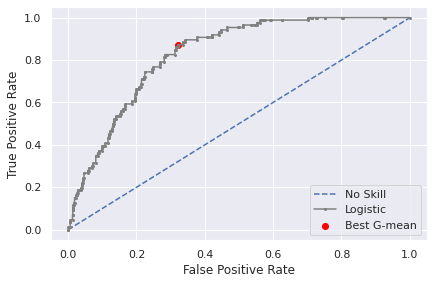

time: 426 ms (started: 2021-06-10 00:39:11 +00:00)


In [ ]:
# calculate roc curves 
fpr, tpr, thresholds_1 = roc_curve(y_test, yhat_test_prob) 

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-mean=%.3f' % (thresholds_1[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic', markersize=4, color='grey')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='red', label='Best G-mean')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [ ]:
tr = thresholds_1[ix]

print("Threshold: ", tr)
df_test_output['yhat_test'] = np.where(df_test_output['yhat_test_prob'] > tr, 1, 0)
df_test_output[df_test_output["ytargets_test"] == 1].head()

Threshold:  0.104629375641802


,ytargets_test,yhat_test_prob,yhat_test
7891,1,0.221139,1
678,1,0.096984,0
5193,1,0.050779,0
1785,1,0.264448,1
1602,1,0.304199,1


time: 22.4 ms (started: 2021-06-10 00:39:11 +00:00)


In [ ]:
# Compose the confusion matrix
pd.crosstab(df_test_output['ytargets_test'], 
            df_test_output['yhat_test'], 
            rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,908,429
1,12,74


time: 32.6 ms (started: 2021-06-10 00:39:11 +00:00)


In [ ]:
# Calculates the AUROC from a set of actual values and their predicted probabilities.
roc_auc_score(df_test_output['ytargets_test'], df_test_output['yhat_test'])

0.7697987511088692

time: 8.39 ms (started: 2021-06-10 00:39:11 +00:00)


In [ ]:
# calculate Gini from AUROC
Gini = roc_auc_score(df_test_output['ytargets_test'], df_test_output['yhat_test_prob']) * 2 - 1
Gini

0.6579377641717834

time: 9.06 ms (started: 2021-06-10 00:39:11 +00:00)




---

